In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [3]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [5]:
df.head()


,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [6]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


<Axes: xlabel='activity', ylabel='count'>

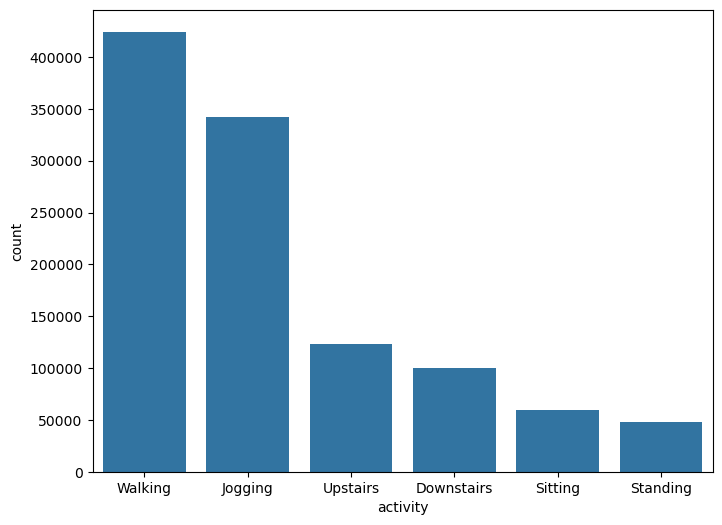

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)
     

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31320/1793805087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31320/1793805087.py:2: UserWarning: 
The palette list has fewer values (1) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],


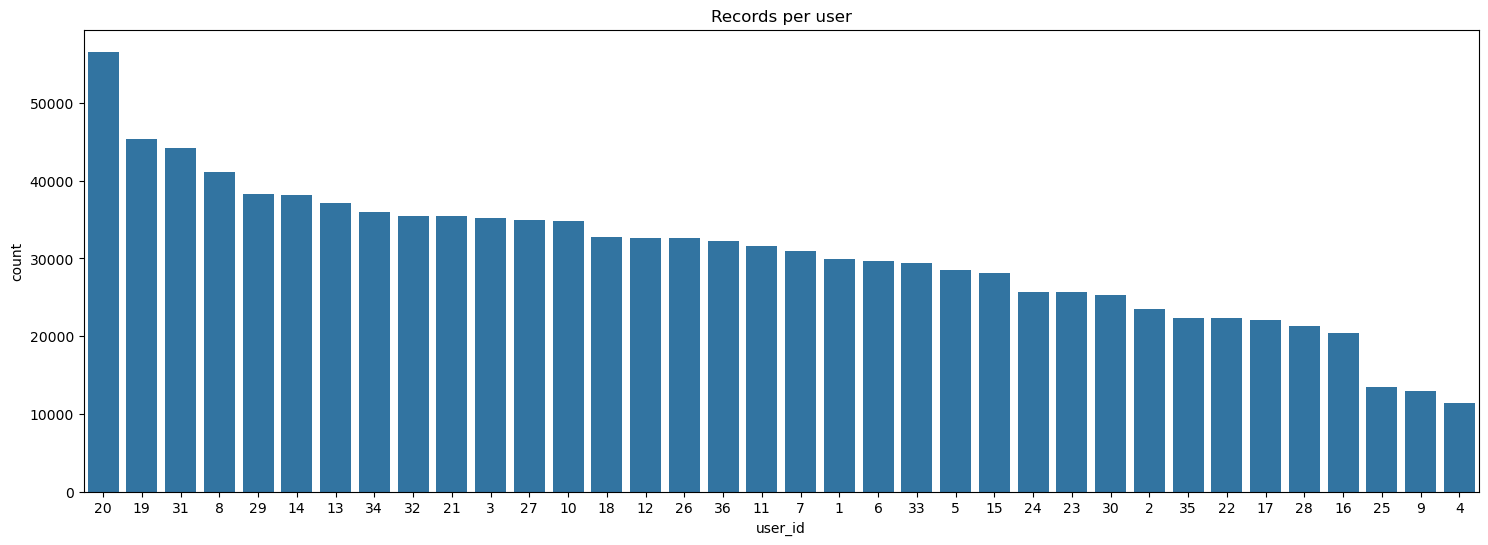

In [8]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
              order = df.user_id.value_counts().index)
plt.title("Records per user");

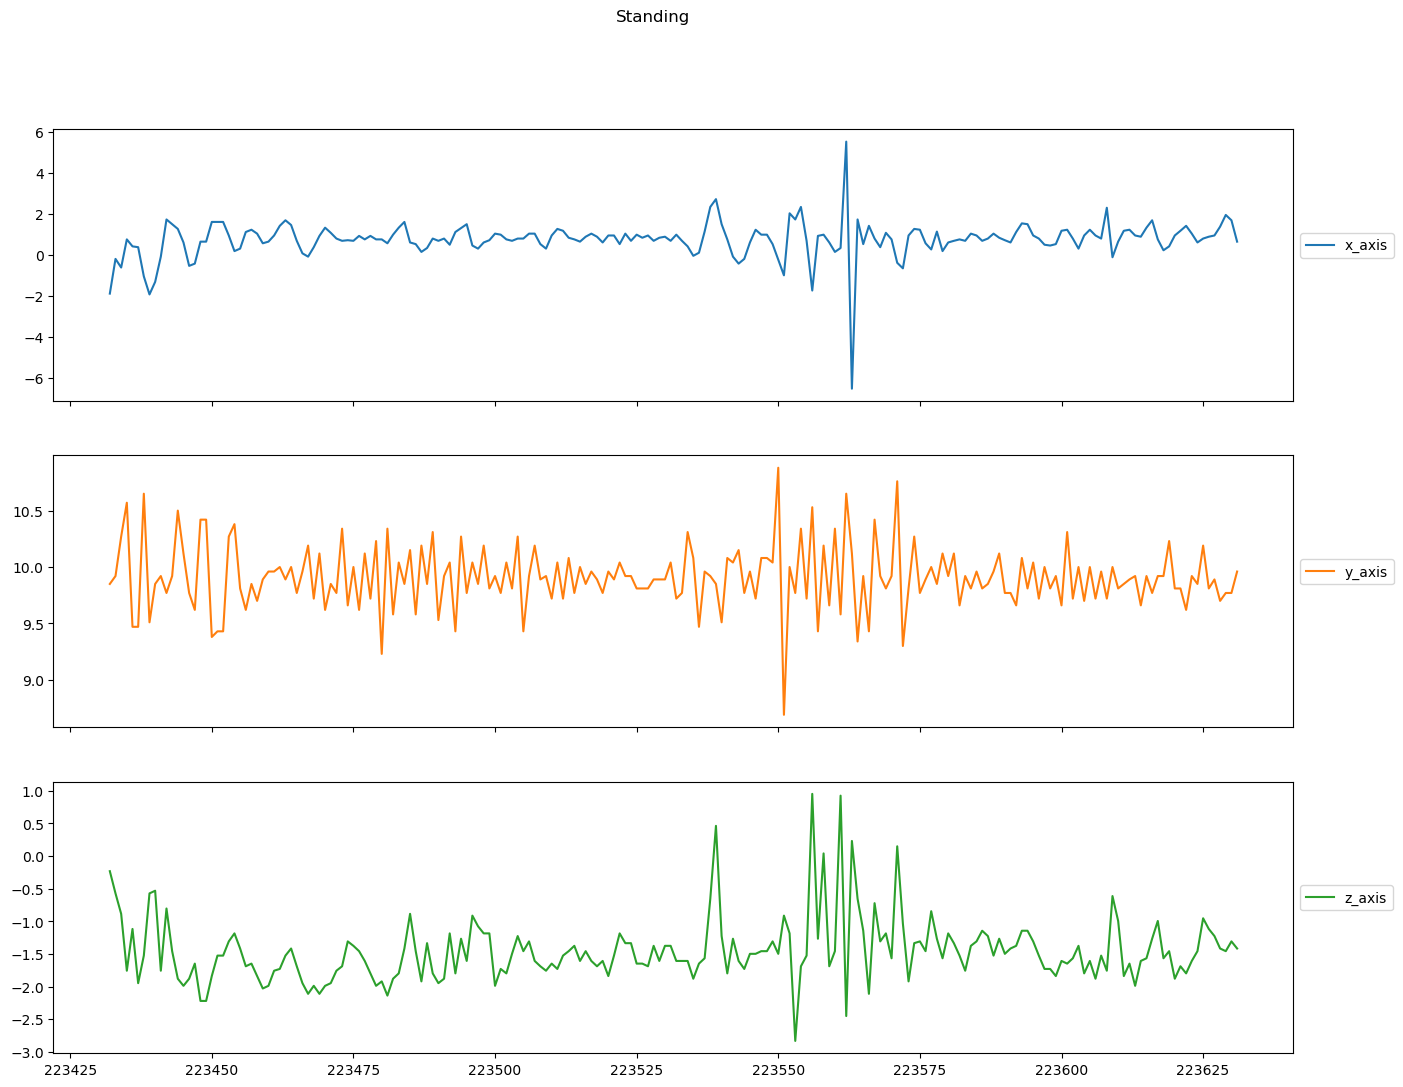

In [9]:
def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Standing", df)

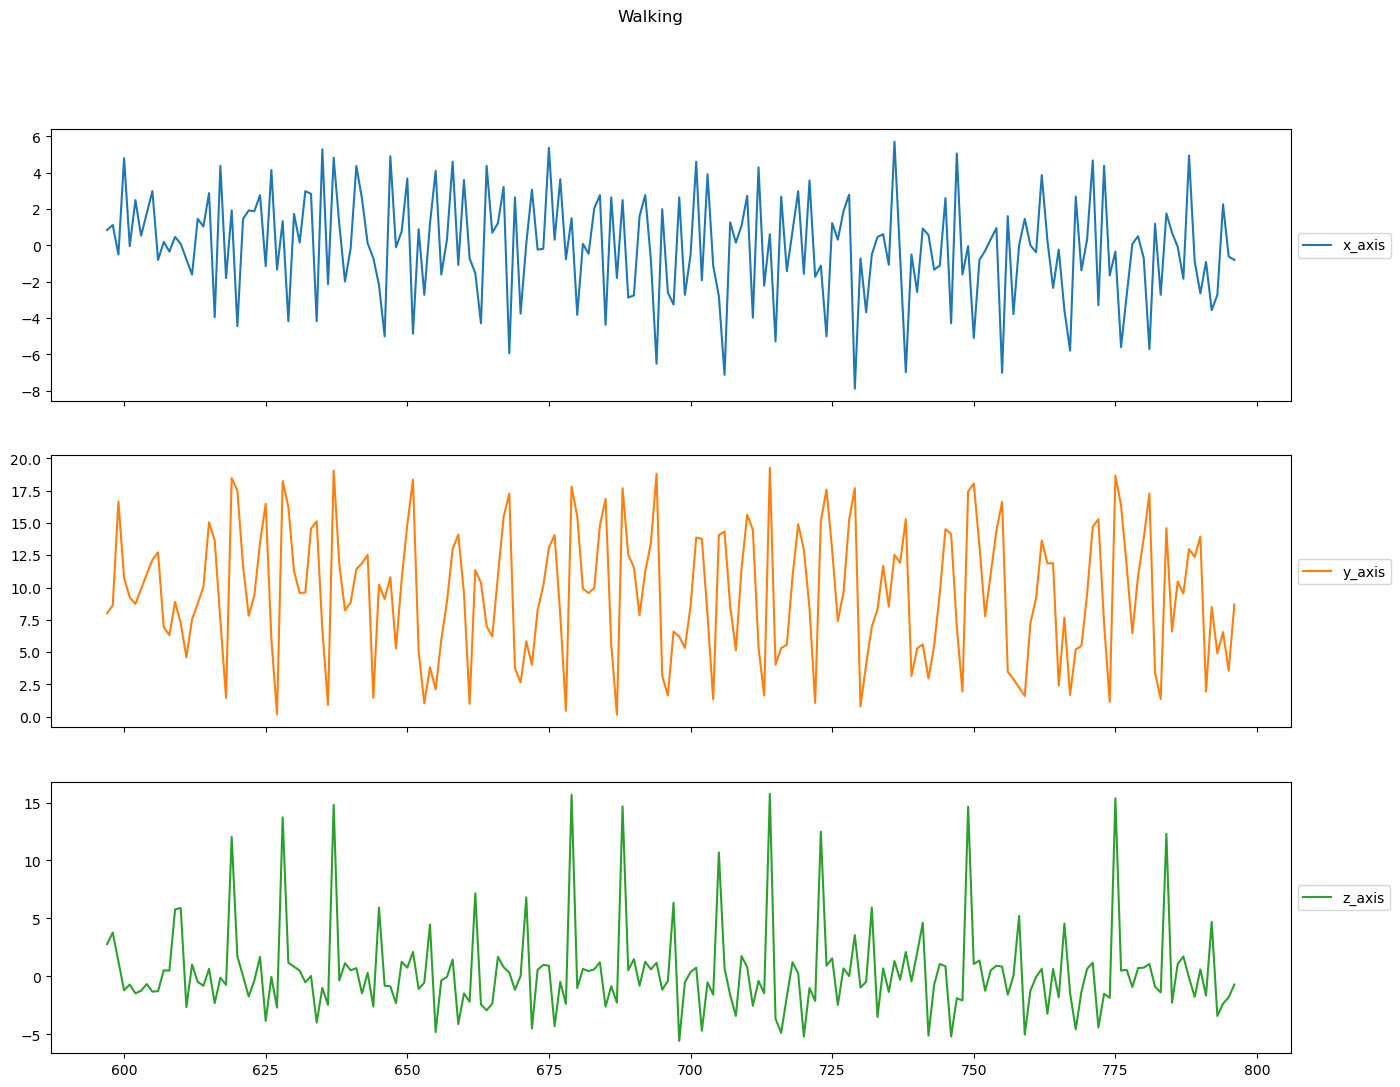

In [11]:
plot_activity("Walking", df)

In [7]:
df.loc[:, 'ActivityEncoded'] = df['ActivityEncoded'].astype('int64')

In [8]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17568, 200, 3) (17568, 1)
(5491, 200, 3) (5491, 1)


In [9]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 학습 데이터에 OneHotEncoder 적용
enc.fit(y_train)

# 학습, 테스트 및 검증 데이터 변환
y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

# 데이터의 모양 출력
print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)

(17568, 200, 3) (17568, 6) (5491, 200, 3) (5491, 6)


In [10]:
#Epoch 500

BATCH_SIZE = 16

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 6)

In [18]:
#2-2
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 199, 64)           448       
                                                                 
 conv1d_5 (Conv1D)           (None, 198, 64)           8256      
                                                                 
 dropout_4 (Dropout)         (None, 198, 64)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_5 (Dropout)         (None, 90)                0         
                                                      

In [19]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-02 02:34:57.185067: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-02 02:34:58.182310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:34:58.568449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:34:59.926678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7548 - accuracy: 0.7367

2024-05-02 02:35:18.679423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:35:18.756077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 65ms/step - loss: 0.7548 - accuracy: 0.7367 - val_loss: 0.6809 - val_accuracy: 0.7659
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.4537 - accuracy: 0.8308 - val_loss: 0.3398 - val_accuracy: 0.8684
Epoch 3/20
275/275 [==============================] - 12s 45ms/step - loss: 0.3244 - accuracy: 0.8773 - val_loss: 0.2821 - val_accuracy: 0.8900
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2563 - accuracy: 0.9051 - val_loss: 0.2790 - val_accuracy: 0.8909
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2115 - accuracy: 0.9237 - val_loss: 0.2714 - val_accuracy: 0.9082
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1720 - accuracy: 0.9362 - val_loss: 0.2286 - val_accuracy: 0.9219
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1507 - accuracy: 0.9476 - val_loss: 0.1603 - val_accuracy: 0.9433
Epo

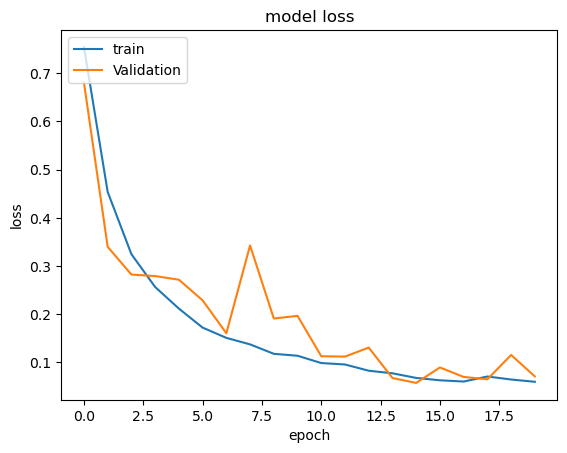

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

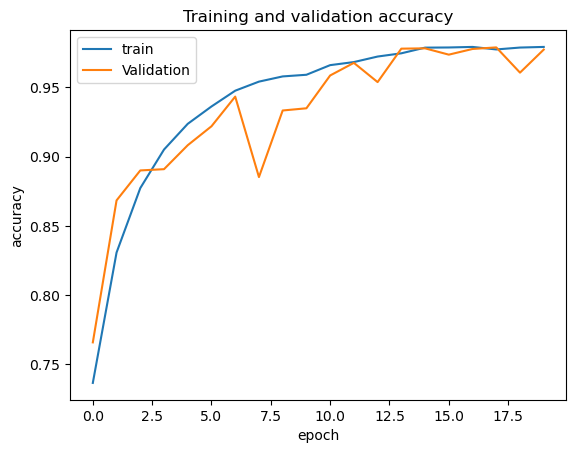

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-02 02:43:51.636826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:43:51.707791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 21ms/step
f1_score =  0.9730215147906702
0.972864687670734
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.97      0.98      1710
           2       0.92      0.93      0.93       614
           3       0.90      0.94      0.92       502
           4       0.99      0.94      0.97       300
           5       0.94      1.00      0.97       242

    accuracy                           0.97      5491
   macro avg       0.96      0.96      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

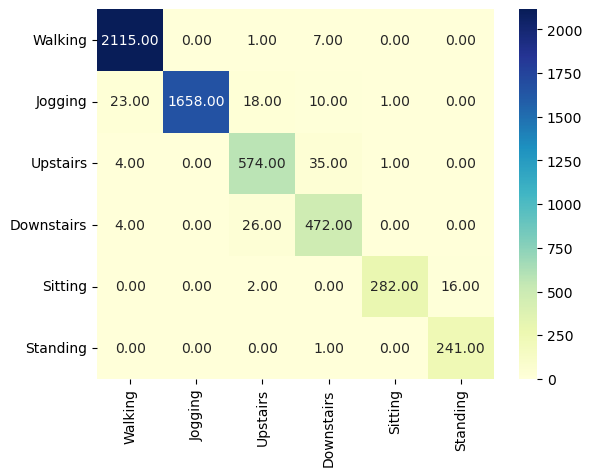

In [22]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [23]:
#4-4
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 197, 64)           832       
                                                                 
 conv1d_7 (Conv1D)           (None, 194, 64)           16448     
                                                                 
 dropout_6 (Dropout)         (None, 194, 64)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 97, 64)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_7 (Dropout)         (None, 90)                0         
                                                      

In [24]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-02 02:44:50.684609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:44:51.070526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:44:51.727011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.7639

2024-05-02 02:45:09.385417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:45:09.476195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 64ms/step - loss: 0.6901 - accuracy: 0.7639 - val_loss: 0.5693 - val_accuracy: 0.7639
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.4003 - accuracy: 0.8505 - val_loss: 0.3089 - val_accuracy: 0.8841
Epoch 3/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2718 - accuracy: 0.9018 - val_loss: 0.2432 - val_accuracy: 0.9051
Epoch 4/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2084 - accuracy: 0.9271 - val_loss: 0.2160 - val_accuracy: 0.9276
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1682 - accuracy: 0.9428 - val_loss: 0.1401 - val_accuracy: 0.9579
Epoch 6/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1434 - accuracy: 0.9538 - val_loss: 0.1383 - val_accuracy: 0.9522
Epoch 7/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1221 - accuracy: 0.9606 - val_loss: 0.1458 - val_accuracy: 0.9492
Epo

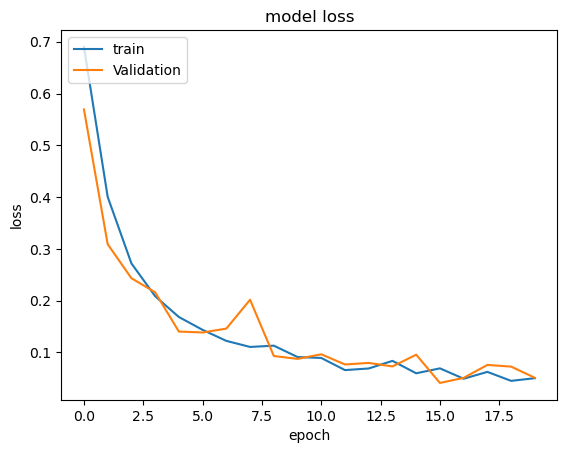

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

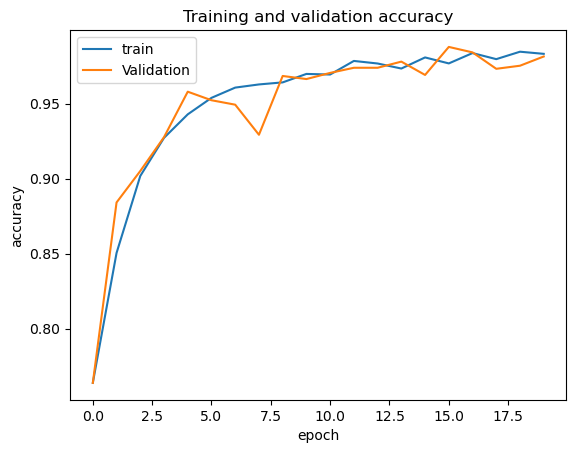

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-02 02:49:51.144304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:49:51.213338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.978916158946732
0.9788745219450009
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.92      0.98      0.95       614
           3       0.96      0.92      0.94       502
           4       1.00      0.94      0.97       300
           5       0.92      1.00      0.96       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

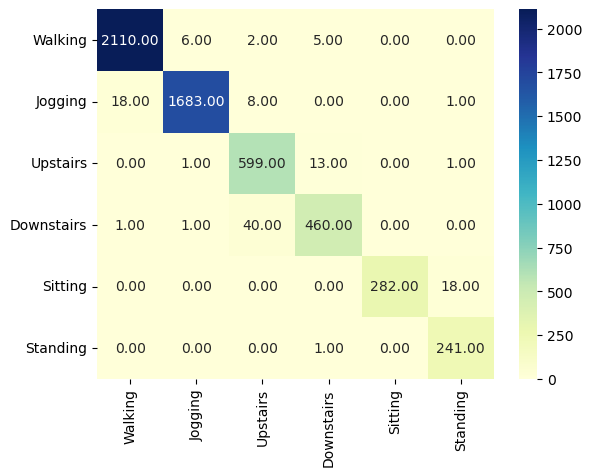

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [28]:
#3-3
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_9 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 dropout_8 (Dropout)         (None, 196, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_9 (Dropout)         (None, 90)                0         
                                                      

In [29]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-02 02:50:52.952284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:50:53.318501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:50:53.979818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6997 - accuracy: 0.7578

2024-05-02 02:51:12.313919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:51:12.391868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.6997 - accuracy: 0.7578 - val_loss: 0.3948 - val_accuracy: 0.8386
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3832 - accuracy: 0.8555 - val_loss: 0.2946 - val_accuracy: 0.8852
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2904 - accuracy: 0.8904 - val_loss: 0.2689 - val_accuracy: 0.8909
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2259 - accuracy: 0.9142 - val_loss: 0.2275 - val_accuracy: 0.9041
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1867 - accuracy: 0.9349 - val_loss: 0.2390 - val_accuracy: 0.9107
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1478 - accuracy: 0.9486 - val_loss: 0.2751 - val_accuracy: 0.9123
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1347 - accuracy: 0.9551 - val_loss: 0.1286 - val_accuracy: 0.9536
Epo

2024-05-02 02:56:32.706181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 02:56:32.780835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.965548147556751
0.9650336914951739
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2123
           1       0.98      0.97      0.98      1710
           2       0.92      0.95      0.94       614
           3       0.86      0.96      0.91       502
           4       1.00      0.95      0.97       300
           5       0.93      1.00      0.96       242

    accuracy                           0.97      5491
   macro avg       0.95      0.97      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

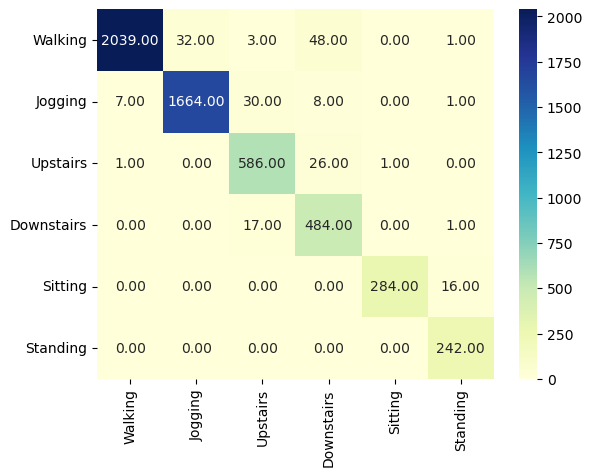

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [16]:
#5-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

2024-05-03 16:02:43.987893: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-03 16:02:43.989062: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 196, 64)           1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 192, 64)           20544     
                                                                 
 dropout (Dropout)           (None, 192, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 90)                55800     
                                                                 
 dropout_1 (Dropout)         (None, 90)                0         
                      

In [17]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 16:02:56.850585: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-03 16:02:57.884185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:02:58.271851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:02:59.180021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6775 - accuracy: 0.7654

2024-05-03 16:03:17.196455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:03:17.273162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 63ms/step - loss: 0.6775 - accuracy: 0.7654 - val_loss: 0.4232 - val_accuracy: 0.8276
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.3396 - accuracy: 0.8773 - val_loss: 0.2328 - val_accuracy: 0.9128
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2511 - accuracy: 0.9104 - val_loss: 0.2285 - val_accuracy: 0.9176
Epoch 4/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2037 - accuracy: 0.9300 - val_loss: 0.1524 - val_accuracy: 0.9449
Epoch 5/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1646 - accuracy: 0.9429 - val_loss: 0.1855 - val_accuracy: 0.9326
Epoch 6/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1320 - accuracy: 0.9561 - val_loss: 0.2663 - val_accuracy: 0.9046
Epoch 7/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1132 - accuracy: 0.9635 - val_loss: 0.1111 - val_accuracy: 0.9643
Epo

2024-05-03 16:09:37.345974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:09:37.410951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9829400675263406
0.9828810781278455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      0.99      0.99      1710
           2       0.93      0.97      0.95       614
           3       0.96      0.94      0.95       502
           4       0.99      0.95      0.97       300
           5       0.94      0.99      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

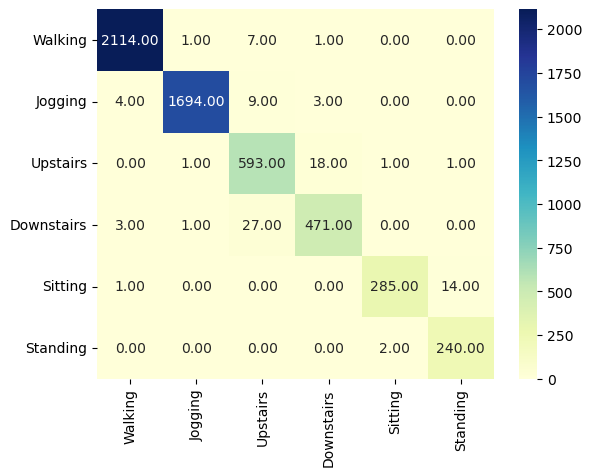

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [19]:
#6-6
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 195, 64)           1216      
                                                                 
 conv1d_3 (Conv1D)           (None, 190, 64)           24640     
                                                                 
 dropout_2 (Dropout)         (None, 190, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 95, 64)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_3 (Dropout)         (None, 90)                0         
                                                      

In [20]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 16:10:27.079566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:10:27.439936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:10:28.069816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.7633

2024-05-03 16:10:44.956611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:10:45.036162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 61ms/step - loss: 0.6931 - accuracy: 0.7633 - val_loss: 0.4554 - val_accuracy: 0.8128
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.4010 - accuracy: 0.8467 - val_loss: 0.3476 - val_accuracy: 0.8714
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2846 - accuracy: 0.8882 - val_loss: 0.2303 - val_accuracy: 0.9103
Epoch 4/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2076 - accuracy: 0.9265 - val_loss: 0.3022 - val_accuracy: 0.9069
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1667 - accuracy: 0.9448 - val_loss: 0.1463 - val_accuracy: 0.9533
Epoch 6/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1283 - accuracy: 0.9592 - val_loss: 0.1156 - val_accuracy: 0.9574
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1114 - accuracy: 0.9648 - val_loss: 0.2761 - val_accuracy: 0.9092
Epo

2024-05-03 16:15:55.052959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:15:55.123899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9779765241090239
0.977781824804225
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.96      0.98      1710
           2       0.90      0.96      0.93       614
           3       0.95      0.98      0.97       502
           4       0.99      0.95      0.97       300
           5       0.94      0.99      0.96       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

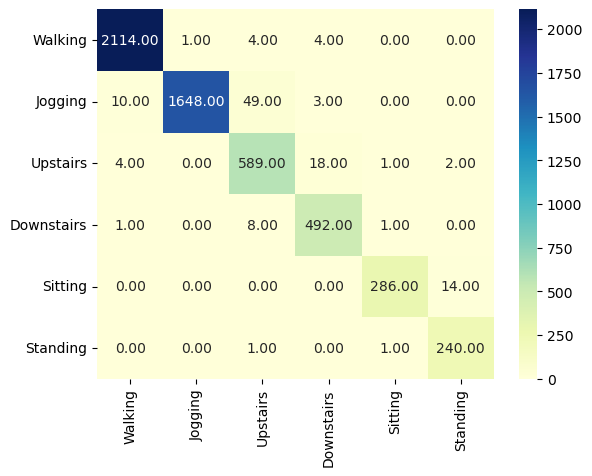

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [22]:
#7-7
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 194, 64)           1408      
                                                                 
 conv1d_5 (Conv1D)           (None, 188, 64)           28736     
                                                                 
 dropout_4 (Dropout)         (None, 188, 64)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_5 (Dropout)         (None, 90)                0         
                                                      

In [23]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 16:16:33.475495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:16:33.815304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:16:34.464460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.7668

2024-05-03 16:16:51.212949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:16:51.290236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 61ms/step - loss: 0.6711 - accuracy: 0.7668 - val_loss: 0.4134 - val_accuracy: 0.8336
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.3619 - accuracy: 0.8607 - val_loss: 0.3484 - val_accuracy: 0.8529
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2603 - accuracy: 0.9005 - val_loss: 0.2326 - val_accuracy: 0.9096
Epoch 4/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2021 - accuracy: 0.9305 - val_loss: 0.1487 - val_accuracy: 0.9524
Epoch 5/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1523 - accuracy: 0.9505 - val_loss: 0.1410 - val_accuracy: 0.9574
Epoch 6/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1248 - accuracy: 0.9606 - val_loss: 0.1114 - val_accuracy: 0.9658
Epoch 7/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1038 - accuracy: 0.9663 - val_loss: 0.1071 - val_accuracy: 0.9688
Epo

2024-05-03 16:21:14.467503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:21:14.540523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 20ms/step
f1_score =  0.9881704241266769
0.9881624476415953
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      0.99      1.00      1710
           2       0.97      0.96      0.97       614
           3       0.96      0.97      0.97       502
           4       1.00      0.95      0.97       300
           5       0.94      0.99      0.97       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

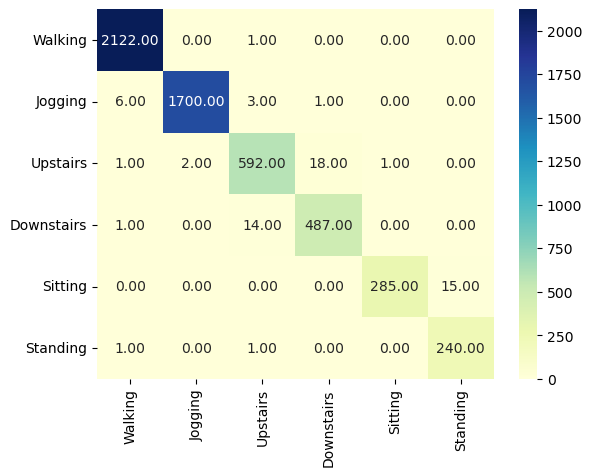

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [26]:
#2-3
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 199, 64)           448       
                                                                 
 conv1d_9 (Conv1D)           (None, 197, 64)           12352     
                                                                 
 dropout_8 (Dropout)         (None, 197, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_9 (Dropout)         (None, 90)                0         
                                                      

In [27]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 16:22:53.175215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:22:53.441103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:22:54.103174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7499 - accuracy: 0.7390

2024-05-03 16:23:11.962484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:23:12.040086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 65ms/step - loss: 0.7499 - accuracy: 0.7390 - val_loss: 0.7502 - val_accuracy: 0.6450
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.4184 - accuracy: 0.8473 - val_loss: 0.3336 - val_accuracy: 0.8695
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2856 - accuracy: 0.8999 - val_loss: 0.2473 - val_accuracy: 0.9060
Epoch 4/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2385 - accuracy: 0.9174 - val_loss: 0.3520 - val_accuracy: 0.8677
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1920 - accuracy: 0.9319 - val_loss: 0.1882 - val_accuracy: 0.9301
Epoch 6/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1659 - accuracy: 0.9438 - val_loss: 0.1795 - val_accuracy: 0.9376
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1384 - accuracy: 0.9519 - val_loss: 0.1432 - val_accuracy: 0.9529
Epo

2024-05-03 16:28:46.362051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:28:46.432958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9794283623385445
0.9792387543252595
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2123
           1       1.00      1.00      1.00      1710
           2       0.91      0.95      0.93       614
           3       0.93      0.95      0.94       502
           4       1.00      0.95      0.98       300
           5       0.95      0.99      0.97       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

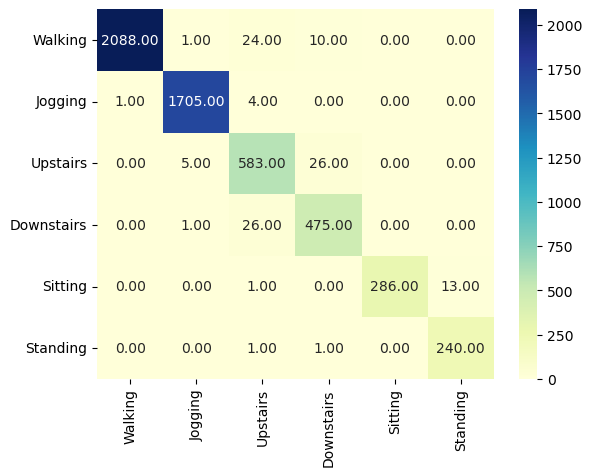

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [29]:
#2-4
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 199, 64)           448       
                                                                 
 conv1d_11 (Conv1D)          (None, 196, 64)           16448     
                                                                 
 dropout_10 (Dropout)        (None, 196, 64)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_11 (Dropout)        (None, 90)                0         
                                                      

In [30]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 16:29:30.418556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:29:30.711483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:29:31.386369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.7601

2024-05-03 16:29:49.581781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:29:49.660420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 65ms/step - loss: 0.6899 - accuracy: 0.7601 - val_loss: 0.3538 - val_accuracy: 0.8709
Epoch 2/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3595 - accuracy: 0.8658 - val_loss: 0.2626 - val_accuracy: 0.8989
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2486 - accuracy: 0.9139 - val_loss: 0.3254 - val_accuracy: 0.8641
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1974 - accuracy: 0.9323 - val_loss: 0.2991 - val_accuracy: 0.8948
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1604 - accuracy: 0.9473 - val_loss: 0.1301 - val_accuracy: 0.9572
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1444 - accuracy: 0.9522 - val_loss: 0.1133 - val_accuracy: 0.9629
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1218 - accuracy: 0.9588 - val_loss: 0.1446 - val_accuracy: 0.9472
Epo

2024-05-03 16:34:19.684066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:34:19.753147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9777513019289658
0.9775997086140958
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.93      0.93      0.93       614
           3       0.91      0.97      0.94       502
           4       0.99      0.95      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

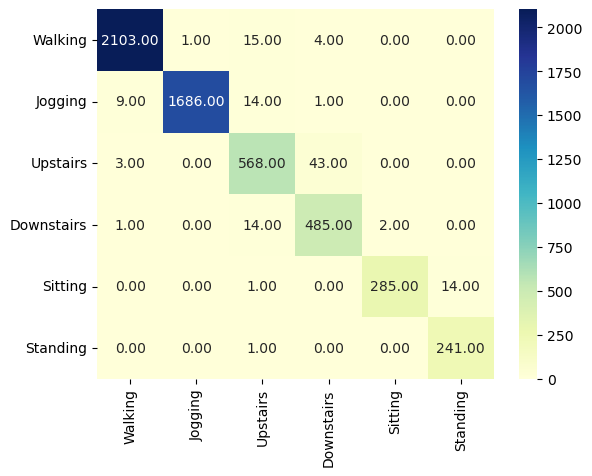

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [32]:
#2-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 199, 64)           448       
                                                                 
 conv1d_13 (Conv1D)          (None, 195, 64)           20544     
                                                                 
 dropout_12 (Dropout)        (None, 195, 64)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 97, 64)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_13 (Dropout)        (None, 90)                0         
                                                      

In [33]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 16:34:51.393705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:34:51.599081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:34:52.325130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7060 - accuracy: 0.7527

2024-05-03 16:35:10.101902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:35:10.184272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 65ms/step - loss: 0.7060 - accuracy: 0.7527 - val_loss: 0.4517 - val_accuracy: 0.8320
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.4049 - accuracy: 0.8492 - val_loss: 0.2945 - val_accuracy: 0.8916
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2738 - accuracy: 0.9008 - val_loss: 0.3166 - val_accuracy: 0.8857
Epoch 4/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2031 - accuracy: 0.9292 - val_loss: 0.3081 - val_accuracy: 0.8896
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1704 - accuracy: 0.9408 - val_loss: 0.1755 - val_accuracy: 0.9312
Epoch 6/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1588 - accuracy: 0.9489 - val_loss: 0.2951 - val_accuracy: 0.8878
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1213 - accuracy: 0.9600 - val_loss: 0.1789 - val_accuracy: 0.9381
Epo

2024-05-03 16:40:59.070373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:40:59.137873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9842305461170286
0.9841558914587507
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      0.99      1.00      1710
           2       0.97      0.92      0.95       614
           3       0.90      0.99      0.94       502
           4       0.98      0.99      0.99       300
           5       1.00      0.97      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.98      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

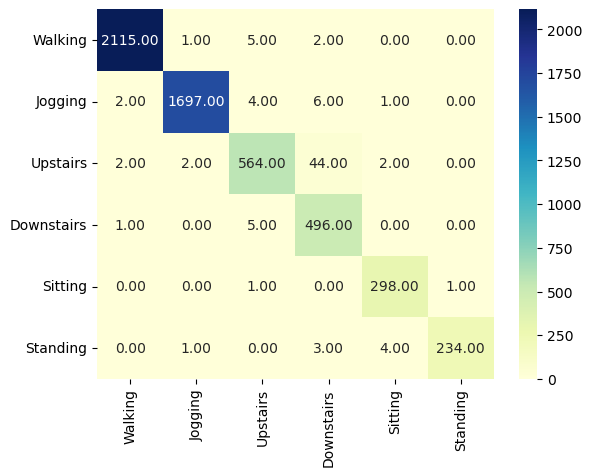

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [35]:
#2-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 199, 64)           448       
                                                                 
 conv1d_15 (Conv1D)          (None, 194, 64)           24640     
                                                                 
 dropout_14 (Dropout)        (None, 194, 64)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 97, 64)           0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_15 (Dropout)        (None, 90)                0         
                                                      

In [36]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 16:42:31.127513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:42:31.325237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:42:31.985011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7090 - accuracy: 0.7569

2024-05-03 16:42:49.608416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:42:49.689312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 64ms/step - loss: 0.7090 - accuracy: 0.7569 - val_loss: 0.4396 - val_accuracy: 0.8242
Epoch 2/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3785 - accuracy: 0.8604 - val_loss: 0.7259 - val_accuracy: 0.7593
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2815 - accuracy: 0.8980 - val_loss: 0.3535 - val_accuracy: 0.8700
Epoch 4/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2145 - accuracy: 0.9241 - val_loss: 0.2147 - val_accuracy: 0.9235
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1572 - accuracy: 0.9472 - val_loss: 0.1339 - val_accuracy: 0.9554
Epoch 6/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1332 - accuracy: 0.9542 - val_loss: 0.1724 - val_accuracy: 0.9449
Epoch 7/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1209 - accuracy: 0.9586 - val_loss: 0.1856 - val_accuracy: 0.9399
Epo

2024-05-03 16:47:42.857274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:47:42.925712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9845398128626578
0.9845201238390093
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2123
           1       1.00      0.98      0.99      1710
           2       0.96      0.94      0.95       614
           3       0.94      0.97      0.95       502
           4       0.99      0.99      0.99       300
           5       0.98      0.99      0.98       242

    accuracy                           0.98      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

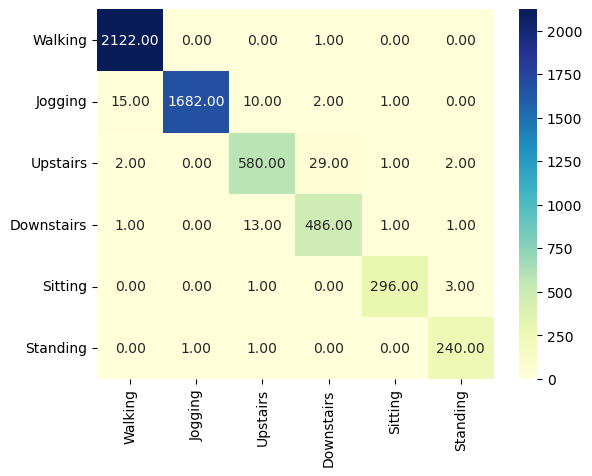

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [11]:
#2-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Metal device set to: Apple M2 Pro


2024-05-03 16:56:01.773852: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-03 16:56:01.774076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 199, 64)           448       
                                                                 
 conv1d_1 (Conv1D)           (None, 193, 64)           28736     
                                                                 
 dropout (Dropout)           (None, 193, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 90)                55800     
                                                                 
 dropout_1 (Dropout)         (None, 90)                0         
                                                        

In [12]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 16:56:03.158319: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-03 16:56:03.974975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:56:04.167045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:56:04.870525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7084 - accuracy: 0.7518

2024-05-03 16:56:21.706123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 16:56:21.780070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 61ms/step - loss: 0.7084 - accuracy: 0.7518 - val_loss: 0.5313 - val_accuracy: 0.8112
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.4249 - accuracy: 0.8399 - val_loss: 0.3380 - val_accuracy: 0.8632
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3057 - accuracy: 0.8806 - val_loss: 0.2528 - val_accuracy: 0.9007
Epoch 4/20
275/275 [==============================] - 13s 45ms/step - loss: 0.2423 - accuracy: 0.9138 - val_loss: 0.2224 - val_accuracy: 0.9208
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1896 - accuracy: 0.9318 - val_loss: 0.2088 - val_accuracy: 0.9306
Epoch 6/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1474 - accuracy: 0.9493 - val_loss: 0.1405 - val_accuracy: 0.9561
Epoch 7/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1587 - accuracy: 0.9478 - val_loss: 0.1638 - val_accuracy: 0.9413
Epo

2024-05-03 17:04:45.684254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:04:45.752217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 18ms/step
f1_score =  0.9689414092789179
0.9686760152977599
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.86      0.99      0.92       614
           3       0.96      0.87      0.91       502
           4       0.99      0.94      0.96       300
           5       0.93      1.00      0.96       242

    accuracy                           0.97      5491
   macro avg       0.95      0.96      0.95      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

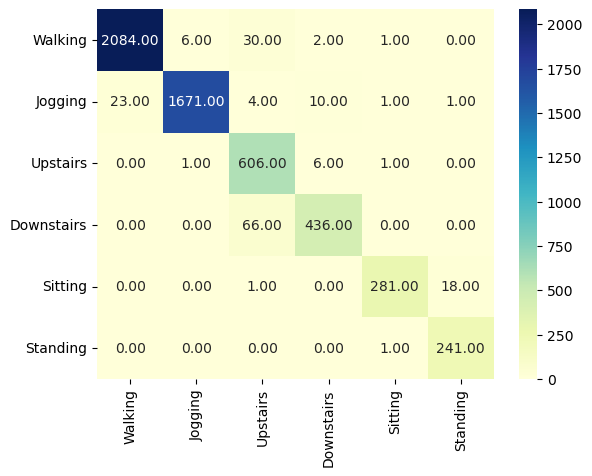

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [14]:
#2-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_3 (Conv1D)           (None, 197, 64)           8256      
                                                                 
 dropout_2 (Dropout)         (None, 197, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_3 (Dropout)         (None, 90)                0         
                                                      

In [15]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 17:05:22.376698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:05:22.705486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:05:23.375196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.7423

2024-05-03 17:05:40.896454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:05:40.974005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 63ms/step - loss: 0.7545 - accuracy: 0.7423 - val_loss: 0.5028 - val_accuracy: 0.8215
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.4398 - accuracy: 0.8350 - val_loss: 0.3756 - val_accuracy: 0.8643
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3155 - accuracy: 0.8850 - val_loss: 0.2959 - val_accuracy: 0.8969
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2315 - accuracy: 0.9154 - val_loss: 0.2114 - val_accuracy: 0.9276
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1918 - accuracy: 0.9316 - val_loss: 0.1392 - val_accuracy: 0.9490
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1568 - accuracy: 0.9452 - val_loss: 0.2303 - val_accuracy: 0.9274
Epoch 7/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1409 - accuracy: 0.9525 - val_loss: 0.1391 - val_accuracy: 0.9554
Epo

2024-05-03 17:10:27.561056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:10:27.632227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.979759990964619
0.9796029867055182
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.94      0.94      0.94       614
           3       0.91      0.98      0.94       502
           4       0.97      0.99      0.98       300
           5       0.99      0.96      0.97       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

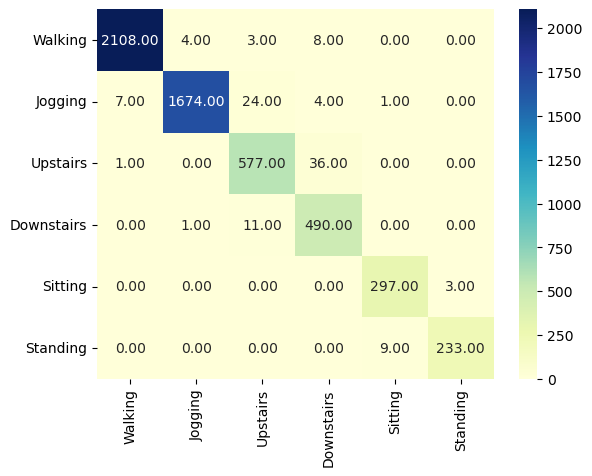

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [17]:
#2-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_5 (Conv1D)           (None, 195, 64)           16448     
                                                                 
 dropout_4 (Dropout)         (None, 195, 64)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 97, 64)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_5 (Dropout)         (None, 90)                0         
                                                      

In [18]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 17:10:57.952200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:10:58.131397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:10:58.760100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7051 - accuracy: 0.7552

2024-05-03 17:11:15.713787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:11:15.789304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 61ms/step - loss: 0.7051 - accuracy: 0.7552 - val_loss: 0.4661 - val_accuracy: 0.8345
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.4030 - accuracy: 0.8558 - val_loss: 0.3569 - val_accuracy: 0.8796
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2739 - accuracy: 0.9022 - val_loss: 0.2359 - val_accuracy: 0.9160
Epoch 4/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2153 - accuracy: 0.9277 - val_loss: 0.2179 - val_accuracy: 0.9228
Epoch 5/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1709 - accuracy: 0.9441 - val_loss: 0.2773 - val_accuracy: 0.9103
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1426 - accuracy: 0.9521 - val_loss: 0.1725 - val_accuracy: 0.9358
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1416 - accuracy: 0.9526 - val_loss: 0.1160 - val_accuracy: 0.9636
Epo

2024-05-03 17:16:28.851898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:16:28.918500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9795967933102795
0.9794208705153888
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.91      0.96      0.93       614
           3       0.94      0.94      0.94       502
           4       0.99      0.97      0.98       300
           5       0.97      0.99      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

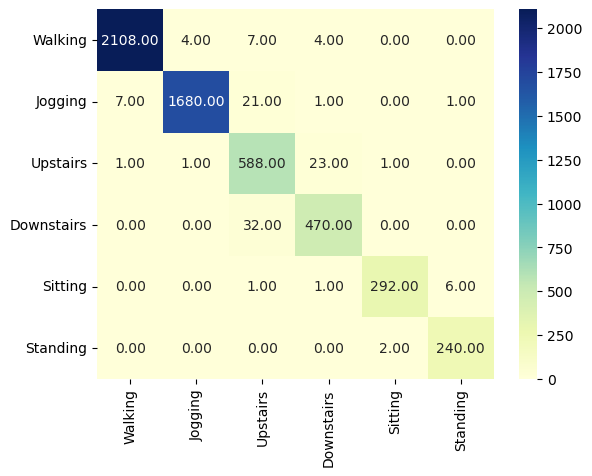

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [21]:
#3-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_9 (Conv1D)           (None, 194, 64)           20544     
                                                                 
 dropout_8 (Dropout)         (None, 194, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 97, 64)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_9 (Dropout)         (None, 90)                0         
                                                      

In [22]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 17:17:44.826739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:17:45.012807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:17:45.670940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7139 - accuracy: 0.7546

2024-05-03 17:18:02.881633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:18:02.960449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 62ms/step - loss: 0.7139 - accuracy: 0.7546 - val_loss: 0.4208 - val_accuracy: 0.8363
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.4674 - accuracy: 0.8284 - val_loss: 0.5352 - val_accuracy: 0.7791
Epoch 3/20
275/275 [==============================] - 12s 45ms/step - loss: 0.3359 - accuracy: 0.8727 - val_loss: 0.2665 - val_accuracy: 0.8985
Epoch 4/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2525 - accuracy: 0.9058 - val_loss: 0.3201 - val_accuracy: 0.8780
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1912 - accuracy: 0.9319 - val_loss: 0.3096 - val_accuracy: 0.8941
Epoch 6/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1650 - accuracy: 0.9423 - val_loss: 0.1661 - val_accuracy: 0.9419
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1306 - accuracy: 0.9578 - val_loss: 0.1040 - val_accuracy: 0.9647
Epo

2024-05-03 17:22:12.330441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:22:12.399591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9789978377290668
0.9788745219450009
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.92      0.96      0.94       614
           3       0.94      0.94      0.94       502
           4       0.99      0.96      0.98       300
           5       0.97      1.00      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

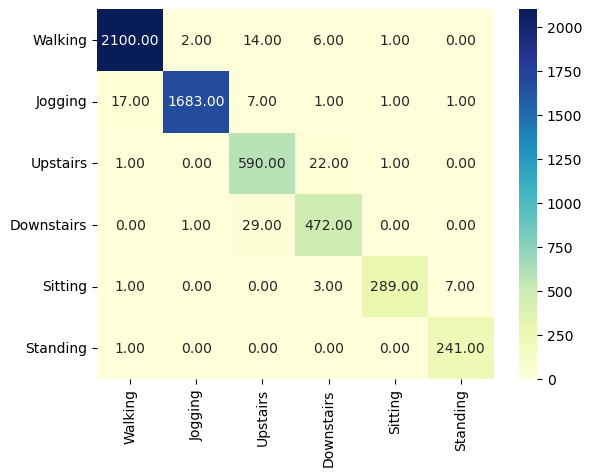

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [24]:
#3-6
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 198, 64)           640       
                                                                 
 conv1d_11 (Conv1D)          (None, 193, 64)           24640     
                                                                 
 dropout_10 (Dropout)        (None, 193, 64)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 96, 64)           0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_11 (Dropout)        (None, 90)                0         
                                                      

In [25]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 17:23:05.580533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:23:05.770326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:23:06.409879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7833 - accuracy: 0.7312

2024-05-03 17:23:24.407653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:23:24.486264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 65ms/step - loss: 0.7833 - accuracy: 0.7312 - val_loss: 0.7379 - val_accuracy: 0.7398
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.4258 - accuracy: 0.8456 - val_loss: 0.4037 - val_accuracy: 0.8301
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2941 - accuracy: 0.8910 - val_loss: 0.2534 - val_accuracy: 0.9021
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2145 - accuracy: 0.9236 - val_loss: 0.2161 - val_accuracy: 0.9246
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1662 - accuracy: 0.9421 - val_loss: 0.1747 - val_accuracy: 0.9353
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1377 - accuracy: 0.9537 - val_loss: 0.2307 - val_accuracy: 0.9224
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1214 - accuracy: 0.9601 - val_loss: 0.1575 - val_accuracy: 0.9510
Epo

2024-05-03 17:31:05.380603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:31:05.450787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9831284199880098
0.9830631943179748
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.95      0.95      0.95       614
           3       0.93      0.96      0.95       502
           4       0.99      0.97      0.98       300
           5       0.98      1.00      0.99       242

    accuracy                           0.98      5491
   macro avg       0.97      0.98      0.98      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

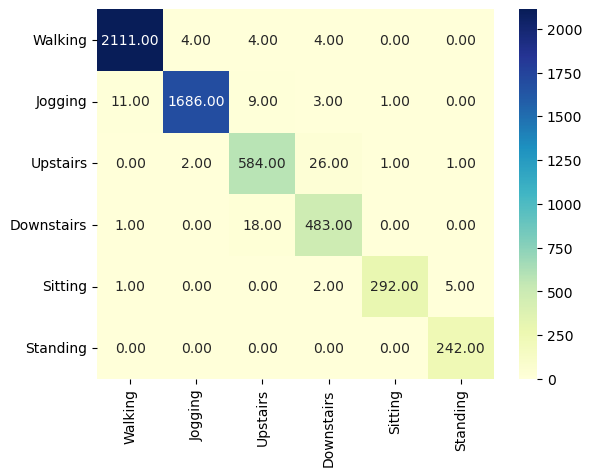

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [27]:
#3-7
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 198, 64)           640       
                                                                 
 conv1d_13 (Conv1D)          (None, 192, 64)           28736     
                                                                 
 dropout_12 (Dropout)        (None, 192, 64)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 96, 64)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_13 (Dropout)        (None, 90)                0         
                                                      

In [28]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 17:31:39.959971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:31:40.148049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:31:40.806387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7497 - accuracy: 0.7454

2024-05-03 17:31:57.878971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 17:31:57.959463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 62ms/step - loss: 0.7497 - accuracy: 0.7454 - val_loss: 0.4956 - val_accuracy: 0.8235
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.4220 - accuracy: 0.8416 - val_loss: 0.6499 - val_accuracy: 0.7605
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2777 - accuracy: 0.8986 - val_loss: 0.2929 - val_accuracy: 0.8855
Epoch 4/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2668 - accuracy: 0.9006 - val_loss: 0.2394 - val_accuracy: 0.9180
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1894 - accuracy: 0.9342 - val_loss: 0.3678 - val_accuracy: 0.8761
Epoch 6/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1568 - accuracy: 0.9473 - val_loss: 0.1537 - val_accuracy: 0.9517
Epoch 7/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1449 - accuracy: 0.9528 - val_loss: 0.4744 - val_accuracy: 0.8657
Epo

2024-05-03 20:20:03.291344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:20:03.371101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 20ms/step
f1_score =  0.9843794588693255
0.98433800764888
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2123
           1       1.00      0.99      0.99      1710
           2       0.95      0.98      0.96       614
           3       0.96      0.95      0.96       502
           4       0.98      0.94      0.96       300
           5       0.93      1.00      0.96       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

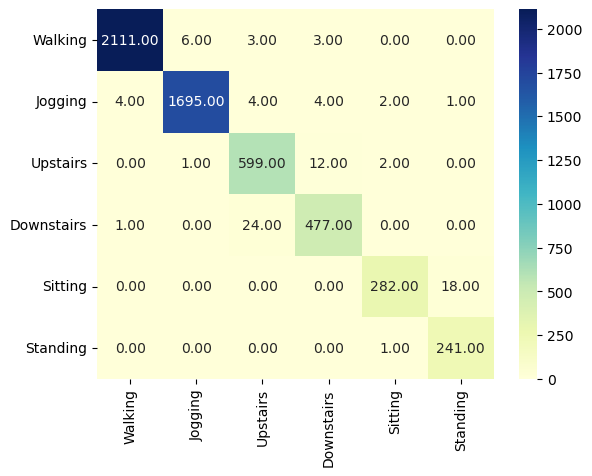

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [30]:
#3-7
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 197, 64)           832       
                                                                 
 conv1d_15 (Conv1D)          (None, 196, 64)           8256      
                                                                 
 dropout_14 (Dropout)        (None, 196, 64)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_15 (Dropout)        (None, 90)                0         
                                                      

In [31]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 20:20:45.843056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:20:46.114043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:20:46.790258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7101 - accuracy: 0.7574

2024-05-03 20:21:05.112826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:21:05.193882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.7101 - accuracy: 0.7574 - val_loss: 0.4919 - val_accuracy: 0.8222
Epoch 2/20
275/275 [==============================] - 14s 51ms/step - loss: 0.4209 - accuracy: 0.8462 - val_loss: 0.3974 - val_accuracy: 0.8445
Epoch 3/20
275/275 [==============================] - 13s 49ms/step - loss: 0.2877 - accuracy: 0.8955 - val_loss: 0.2805 - val_accuracy: 0.8852
Epoch 4/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1966 - accuracy: 0.9302 - val_loss: 0.3544 - val_accuracy: 0.8704
Epoch 5/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1822 - accuracy: 0.9384 - val_loss: 0.3405 - val_accuracy: 0.8816
Epoch 6/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1372 - accuracy: 0.9541 - val_loss: 0.3001 - val_accuracy: 0.9039
Epoch 7/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1308 - accuracy: 0.9564 - val_loss: 0.3679 - val_accuracy: 0.8830
Epo

2024-05-03 20:25:59.776054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:25:59.845909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9657700375971623
0.9653979238754326
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2123
           1       1.00      0.97      0.98      1710
           2       0.93      0.84      0.88       614
           3       0.81      0.99      0.89       502
           4       0.97      0.98      0.98       300
           5       0.98      0.97      0.98       242

    accuracy                           0.97      5491
   macro avg       0.95      0.96      0.95      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

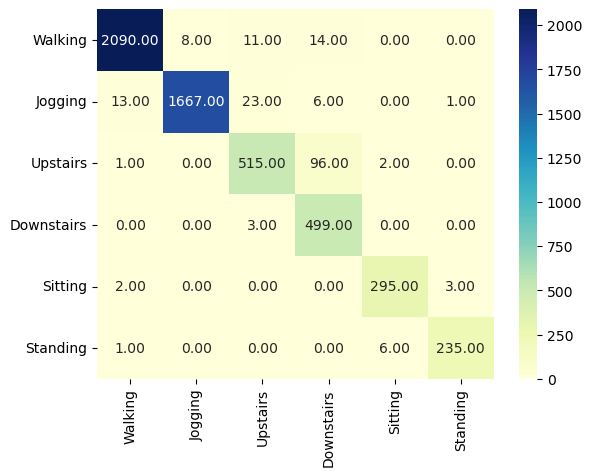

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [38]:
#4-3
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 197, 64)           832       
                                                                 
 conv1d_23 (Conv1D)          (None, 195, 64)           12352     
                                                                 
 dropout_22 (Dropout)        (None, 195, 64)           0         
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 97, 64)           0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_23 (Dropout)        (None, 90)                0         
                                                     

In [35]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 20:27:36.195684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:27:36.384785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:27:37.066499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6629 - accuracy: 0.7668

2024-05-03 20:27:55.341052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:27:55.421120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 67ms/step - loss: 0.6629 - accuracy: 0.7668 - val_loss: 0.5143 - val_accuracy: 0.7814
Epoch 2/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3875 - accuracy: 0.8542 - val_loss: 0.3873 - val_accuracy: 0.8493
Epoch 3/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2969 - accuracy: 0.8910 - val_loss: 0.3965 - val_accuracy: 0.8531
Epoch 4/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2245 - accuracy: 0.9205 - val_loss: 0.2050 - val_accuracy: 0.9328
Epoch 5/20
275/275 [==============================] - 14s 53ms/step - loss: 0.1757 - accuracy: 0.9398 - val_loss: 0.2615 - val_accuracy: 0.9082
Epoch 6/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1363 - accuracy: 0.9547 - val_loss: 0.1444 - val_accuracy: 0.9547
Epoch 7/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1255 - accuracy: 0.9590 - val_loss: 0.1724 - val_accuracy: 0.9372
Epo

2024-05-03 20:34:15.498525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:34:15.575053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9753470680870702
0.9754143143325441
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2123
           1       1.00      0.99      1.00      1710
           2       0.91      0.97      0.94       614
           3       0.96      0.90      0.93       502
           4       0.88      0.98      0.93       300
           5       0.98      0.84      0.91       242

    accuracy                           0.98      5491
   macro avg       0.95      0.95      0.95      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

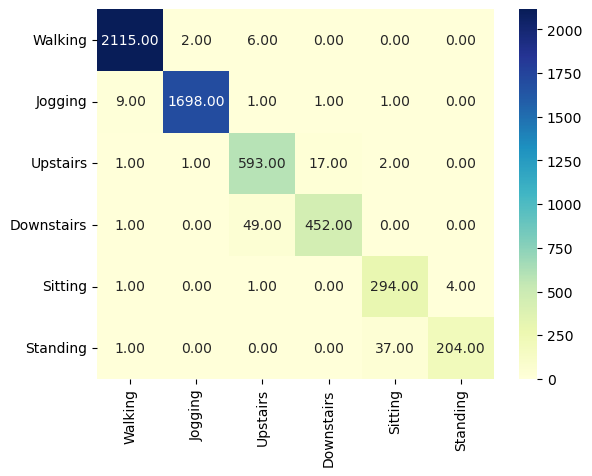

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [39]:
#4-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 197, 64)           832       
                                                                 
 conv1d_25 (Conv1D)          (None, 193, 64)           20544     
                                                                 
 dropout_24 (Dropout)        (None, 193, 64)           0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 96, 64)           0         
 g1D)                                                            
                                                                 
 lstm_12 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_25 (Dropout)        (None, 90)                0         
                                                     

In [40]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 20:38:43.321441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:38:43.532235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:38:44.258709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7054 - accuracy: 0.7611

2024-05-03 20:39:02.187514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:39:02.276220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.7054 - accuracy: 0.7611 - val_loss: 0.4259 - val_accuracy: 0.8486
Epoch 2/20
275/275 [==============================] - 14s 52ms/step - loss: 0.3719 - accuracy: 0.8604 - val_loss: 0.2856 - val_accuracy: 0.8862
Epoch 3/20
275/275 [==============================] - 15s 54ms/step - loss: 0.2674 - accuracy: 0.9020 - val_loss: 0.2467 - val_accuracy: 0.9044
Epoch 4/20
275/275 [==============================] - 14s 49ms/step - loss: 0.2048 - accuracy: 0.9264 - val_loss: 0.2041 - val_accuracy: 0.9230
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1481 - accuracy: 0.9500 - val_loss: 0.1570 - val_accuracy: 0.9447
Epoch 6/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1298 - accuracy: 0.9560 - val_loss: 0.2363 - val_accuracy: 0.9158
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1142 - accuracy: 0.9627 - val_loss: 0.1548 - val_accuracy: 0.9485
Epo

2024-05-03 20:45:16.656982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:45:16.732356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9778155659696526
0.9775997086140958
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.98      0.91      0.94       614
           3       0.87      0.99      0.93       502
           4       1.00      0.93      0.97       300
           5       0.93      1.00      0.96       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

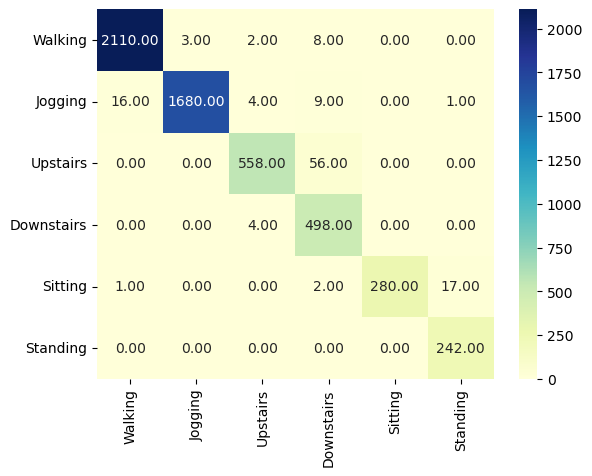

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [42]:
#4-6
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 197, 64)           832       
                                                                 
 conv1d_27 (Conv1D)          (None, 192, 64)           24640     
                                                                 
 dropout_26 (Dropout)        (None, 192, 64)           0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 96, 64)           0         
 g1D)                                                            
                                                                 
 lstm_13 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_27 (Dropout)        (None, 90)                0         
                                                     

In [43]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-03 20:59:53.427105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:59:53.672946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 20:59:54.433156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6793 - accuracy: 0.7690

2024-05-03 21:00:13.034899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 21:00:13.129770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 68ms/step - loss: 0.6793 - accuracy: 0.7690 - val_loss: 0.4221 - val_accuracy: 0.8427
Epoch 2/20
275/275 [==============================] - 13s 49ms/step - loss: 0.3919 - accuracy: 0.8560 - val_loss: 0.2605 - val_accuracy: 0.9010
Epoch 3/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2716 - accuracy: 0.9006 - val_loss: 0.2495 - val_accuracy: 0.9094
Epoch 4/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1962 - accuracy: 0.9307 - val_loss: 0.2320 - val_accuracy: 0.9201
Epoch 5/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1556 - accuracy: 0.9473 - val_loss: 0.1973 - val_accuracy: 0.9337
Epoch 6/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1381 - accuracy: 0.9525 - val_loss: 0.1413 - val_accuracy: 0.9531
Epoch 7/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1130 - accuracy: 0.9616 - val_loss: 0.0939 - val_accuracy: 0.9699
Epo

2024-05-03 21:21:00.015570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-03 21:21:00.094370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9863937838021235
0.9863412857403023
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      1.00      1.00      1710
           2       0.94      0.98      0.96       614
           3       0.97      0.95      0.96       502
           4       0.98      0.99      0.99       300
           5       0.99      0.99      0.99       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

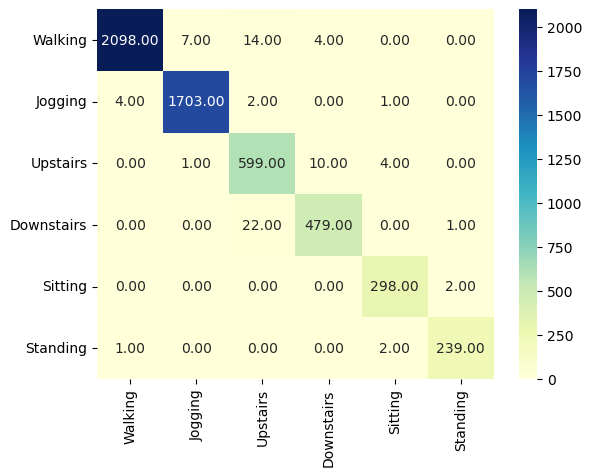

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [45]:
#4-7
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 197, 64)           832       
                                                                 
 conv1d_29 (Conv1D)          (None, 191, 64)           28736     
                                                                 
 dropout_28 (Dropout)        (None, 191, 64)           0         
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 95, 64)           0         
 g1D)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_29 (Dropout)        (None, 90)                0         
                                                     

In [46]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-04 00:46:56.088780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-04 00:46:56.319972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-04 00:46:57.072948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.7696

2024-05-04 00:47:15.103791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-04 00:47:15.189738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.6848 - accuracy: 0.7696 - val_loss: 0.5233 - val_accuracy: 0.8340
Epoch 2/20
275/275 [==============================] - 13s 49ms/step - loss: 0.3953 - accuracy: 0.8540 - val_loss: 0.3080 - val_accuracy: 0.8816
Epoch 3/20
275/275 [==============================] - 13s 49ms/step - loss: 0.2636 - accuracy: 0.9042 - val_loss: 0.2458 - val_accuracy: 0.9135
Epoch 4/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1993 - accuracy: 0.9285 - val_loss: 0.1641 - val_accuracy: 0.9438
Epoch 5/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1619 - accuracy: 0.9444 - val_loss: 0.2448 - val_accuracy: 0.9098
Epoch 6/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1318 - accuracy: 0.9562 - val_loss: 0.1825 - val_accuracy: 0.9376
Epoch 7/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1139 - accuracy: 0.9625 - val_loss: 0.1393 - val_accuracy: 0.9558
Epo

2024-05-04 00:52:20.143801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-04 00:52:20.224216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9843844360702991
0.98433800764888
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.99      0.92      0.95       614
           3       0.90      0.99      0.95       502
           4       0.99      0.97      0.98       300
           5       0.98      1.00      0.99       242

    accuracy                           0.98      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.98      0.98      5491



<Axes: >

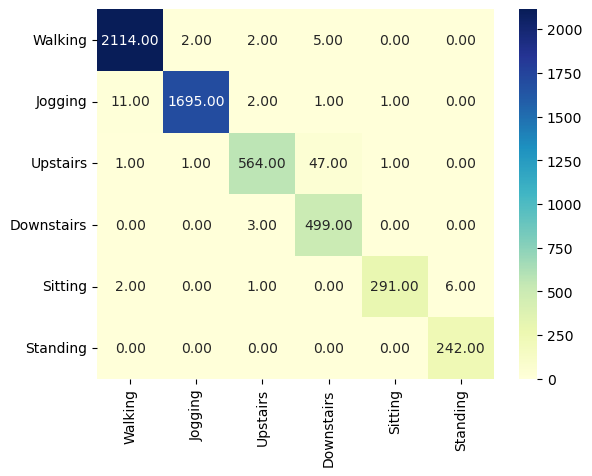

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [52]:
#5-2
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 196, 64)           1024      
                                                                 
 conv1d_35 (Conv1D)          (None, 195, 64)           8256      
                                                                 
 dropout_34 (Dropout)        (None, 195, 64)           0         
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 97, 64)           0         
 g1D)                                                            
                                                                 
 lstm_17 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_35 (Dropout)        (None, 90)                0         
                                                     

In [53]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-04 02:22:17.196462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-04 02:22:17.422648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-04 02:22:18.184478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6811 - accuracy: 0.7620

2024-05-04 02:22:37.091149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-04 02:22:37.178354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 69ms/step - loss: 0.6811 - accuracy: 0.7620 - val_loss: 0.4275 - val_accuracy: 0.8331
Epoch 2/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3610 - accuracy: 0.8589 - val_loss: 0.2842 - val_accuracy: 0.8862
Epoch 3/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2855 - accuracy: 0.8920 - val_loss: 0.2102 - val_accuracy: 0.9126
Epoch 4/20
275/275 [==============================] - 13s 49ms/step - loss: 0.2208 - accuracy: 0.9204 - val_loss: 0.2369 - val_accuracy: 0.9114
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1962 - accuracy: 0.9312 - val_loss: 0.1705 - val_accuracy: 0.9388
Epoch 6/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1522 - accuracy: 0.9484 - val_loss: 0.1968 - val_accuracy: 0.9267
Epoch 7/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1281 - accuracy: 0.9588 - val_loss: 0.1749 - val_accuracy: 0.9431
Epo

2024-05-04 02:35:58.620447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-04 02:35:58.701363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9809215754203079
0.9808778000364232
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.93      0.97      0.95       614
           3       0.96      0.93      0.95       502
           4       0.99      0.94      0.96       300
           5       0.93      1.00      0.96       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

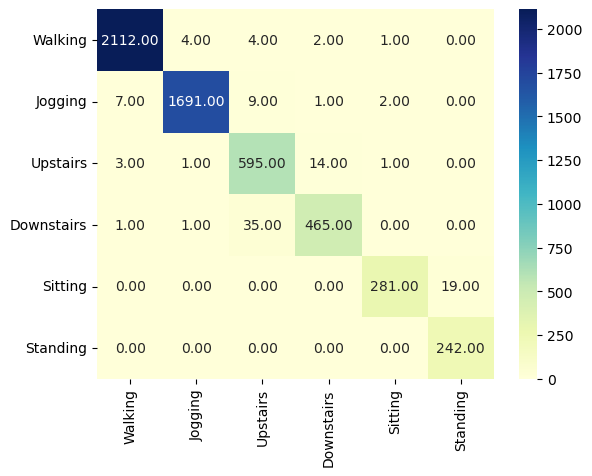

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [51]:
#5-3
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 196, 64)           1024      
                                                                 
 conv1d_33 (Conv1D)          (None, 194, 64)           12352     
                                                                 
 dropout_32 (Dropout)        (None, 194, 64)           0         
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 97, 64)           0         
 g1D)                                                            
                                                                 
 lstm_16 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_33 (Dropout)        (None, 90)                0         
                                                     

In [55]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20
275/275 [==============================] - 14s 52ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0807 - val_accuracy: 0.9731
Epoch 2/20
275/275 [==============================] - 15s 53ms/step - loss: 0.0464 - accuracy: 0.9848 - val_loss: 0.0593 - val_accuracy: 0.9811
Epoch 3/20
275/275 [==============================] - 15s 54ms/step - loss: 0.0434 - accuracy: 0.9857 - val_loss: 0.0462 - val_accuracy: 0.9843
Epoch 4/20
275/275 [==============================] - 15s 53ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 5/20
275/275 [==============================] - 14s 53ms/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0929 - val_accuracy: 0.9715
Epoch 6/20
275/275 [==============================] - 15s 56ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 7/20
275/275 [==============================] - 16s 57ms/step - loss: 0.0576 - accuracy: 0.9825 - val_loss: 0.0603 - val_accuracy:

In [11]:
#5-4
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Metal device set to: Apple M2 Pro


2024-05-05 01:18:48.844409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-05 01:18:48.845237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 196, 64)           1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 193, 64)           16448     
                                                                 
 dropout (Dropout)           (None, 193, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 90)                55800     
                                                                 
 dropout_1 (Dropout)         (None, 90)                0         
                                                        

In [12]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 01:18:58.244331: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-05 01:18:59.097978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:18:59.321353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:19:00.063794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6694 - accuracy: 0.7661

2024-05-05 01:19:16.966298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:19:17.041988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 61ms/step - loss: 0.6694 - accuracy: 0.7661 - val_loss: 0.5899 - val_accuracy: 0.7352
Epoch 2/20
275/275 [==============================] - 12s 44ms/step - loss: 0.3570 - accuracy: 0.8689 - val_loss: 0.2516 - val_accuracy: 0.9037
Epoch 3/20
275/275 [==============================] - 12s 44ms/step - loss: 0.2753 - accuracy: 0.9027 - val_loss: 0.1901 - val_accuracy: 0.9301
Epoch 4/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1737 - accuracy: 0.9390 - val_loss: 0.2211 - val_accuracy: 0.9137
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1533 - accuracy: 0.9471 - val_loss: 0.1483 - val_accuracy: 0.9456
Epoch 6/20
275/275 [==============================] - 12s 44ms/step - loss: 0.1449 - accuracy: 0.9514 - val_loss: 0.1295 - val_accuracy: 0.9460
Epoch 7/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1183 - accuracy: 0.9602 - val_loss: 0.1390 - val_accuracy: 0.9483
Epo

2024-05-05 01:23:40.351575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:23:40.418484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9845714100715248
0.9845201238390093
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2123
           1       1.00      0.99      1.00      1710
           2       0.98      0.92      0.95       614
           3       0.91      0.99      0.95       502
           4       0.99      0.98      0.98       300
           5       0.99      0.98      0.99       242

    accuracy                           0.98      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.98      0.98      5491



<Axes: >

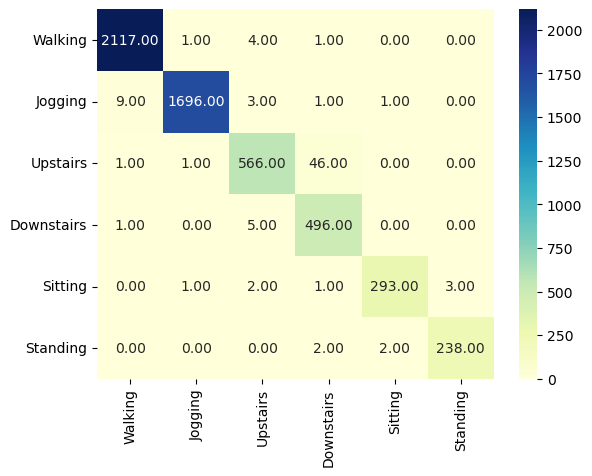

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [17]:
#5-6
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=6, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 196, 64)           1024      
                                                                 
 conv1d_5 (Conv1D)           (None, 191, 64)           24640     
                                                                 
 dropout_4 (Dropout)         (None, 191, 64)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 95, 64)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_5 (Dropout)         (None, 90)                0         
                                                      

In [18]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 01:24:53.189825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:24:53.381508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:24:54.019995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.7616

2024-05-05 01:25:11.039023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:25:11.118601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 62ms/step - loss: 0.6990 - accuracy: 0.7616 - val_loss: 0.5208 - val_accuracy: 0.8140
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.4164 - accuracy: 0.8511 - val_loss: 0.3492 - val_accuracy: 0.8679
Epoch 3/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2635 - accuracy: 0.9069 - val_loss: 0.1876 - val_accuracy: 0.9358
Epoch 4/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2032 - accuracy: 0.9315 - val_loss: 0.1590 - val_accuracy: 0.9442
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1551 - accuracy: 0.9473 - val_loss: 0.2613 - val_accuracy: 0.9057
Epoch 6/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1491 - accuracy: 0.9524 - val_loss: 0.1513 - val_accuracy: 0.9513
Epoch 7/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1194 - accuracy: 0.9607 - val_loss: 0.2374 - val_accuracy: 0.9039
Epo

172/172 [==============================] - 3s 16ms/step
f1_score =  0.9753380510378832
0.9750500819522856
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.96      0.98      1710
           2       0.90      0.95      0.92       614
           3       0.92      0.98      0.95       502
           4       0.98      0.98      0.98       300
           5       0.98      0.98      0.98       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

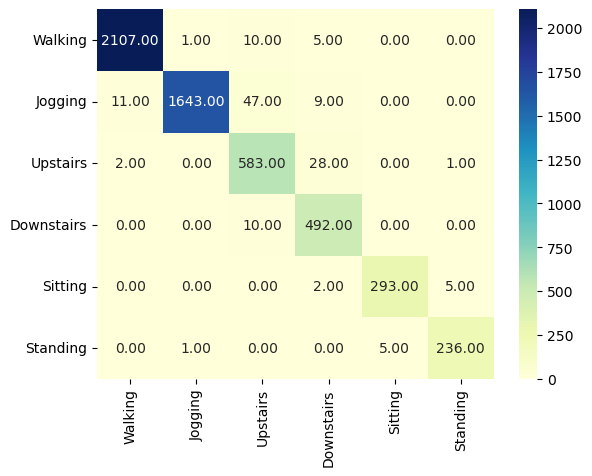

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [21]:
#5-7
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 196, 64)           1024      
                                                                 
 conv1d_7 (Conv1D)           (None, 190, 64)           28736     
                                                                 
 dropout_6 (Dropout)         (None, 190, 64)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 95, 64)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_7 (Dropout)         (None, 90)                0         
                                                      

In [22]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 01:30:17.191386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:30:17.373032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:30:18.007852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.7666

2024-05-05 01:30:35.038245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:30:35.117599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 21s 62ms/step - loss: 0.6814 - accuracy: 0.7666 - val_loss: 0.4181 - val_accuracy: 0.8320
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3704 - accuracy: 0.8585 - val_loss: 0.2779 - val_accuracy: 0.8868
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3047 - accuracy: 0.8864 - val_loss: 0.3174 - val_accuracy: 0.8871
Epoch 4/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2158 - accuracy: 0.9226 - val_loss: 0.1649 - val_accuracy: 0.9410
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1691 - accuracy: 0.9431 - val_loss: 0.1865 - val_accuracy: 0.9337
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1449 - accuracy: 0.9525 - val_loss: 0.1412 - val_accuracy: 0.9483
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1158 - accuracy: 0.9632 - val_loss: 0.1861 - val_accuracy: 0.9328
Epo

2024-05-05 01:36:43.876910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:36:43.947219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9813800304758457
0.9812420324166818
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.95      0.94      0.94       614
           3       0.91      0.98      0.94       502
           4       0.98      0.98      0.98       300
           5       0.98      0.98      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.98      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

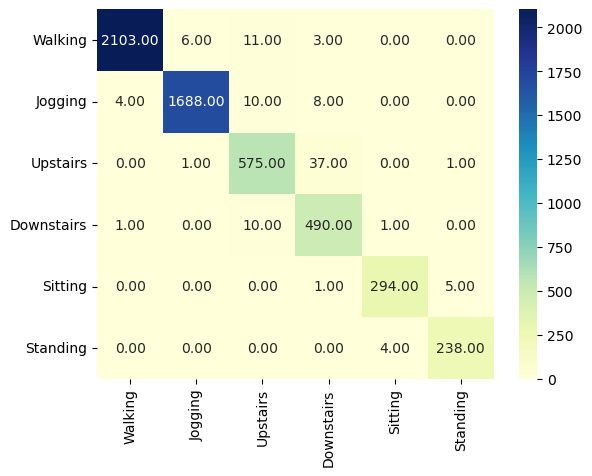

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [24]:
#6-2
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 195, 64)           1216      
                                                                 
 conv1d_9 (Conv1D)           (None, 194, 64)           8256      
                                                                 
 dropout_8 (Dropout)         (None, 194, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 97, 64)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_9 (Dropout)         (None, 90)                0         
                                                      

In [25]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 01:37:03.934932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:37:04.125423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:37:04.789746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6803 - accuracy: 0.7717

2024-05-05 01:37:22.776803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:37:22.855956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 65ms/step - loss: 0.6803 - accuracy: 0.7717 - val_loss: 0.6386 - val_accuracy: 0.7534
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3922 - accuracy: 0.8553 - val_loss: 0.3246 - val_accuracy: 0.8695
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2820 - accuracy: 0.8989 - val_loss: 0.2120 - val_accuracy: 0.9180
Epoch 4/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1958 - accuracy: 0.9310 - val_loss: 0.2262 - val_accuracy: 0.9098
Epoch 5/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1702 - accuracy: 0.9426 - val_loss: 0.4757 - val_accuracy: 0.8520
Epoch 6/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1607 - accuracy: 0.9480 - val_loss: 0.1444 - val_accuracy: 0.9485
Epoch 7/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1270 - accuracy: 0.9567 - val_loss: 0.3208 - val_accuracy: 0.8939
Epo

2024-05-05 01:43:23.209843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:43:23.282918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9775056732698394
0.9772354762338372
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      0.97      0.98      1710
           2       0.90      0.94      0.92       614
           3       0.92      0.97      0.95       502
           4       0.99      0.98      0.98       300
           5       0.96      0.99      0.97       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

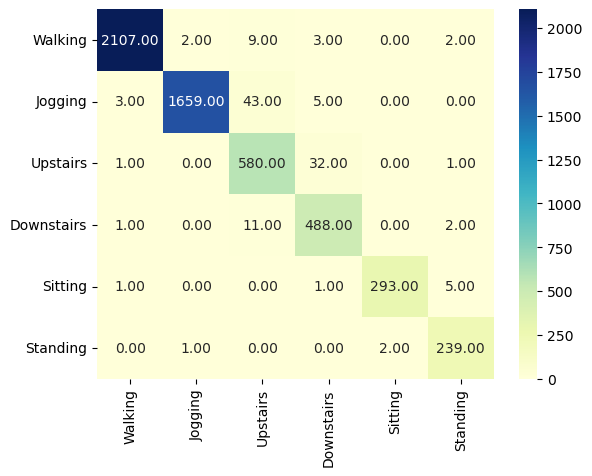

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [29]:
#6-3
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 195, 64)           1216      
                                                                 
 conv1d_13 (Conv1D)          (None, 193, 64)           12352     
                                                                 
 dropout_12 (Dropout)        (None, 193, 64)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 96, 64)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_13 (Dropout)        (None, 90)                0         
                                                      

In [30]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 01:43:57.010590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:43:57.222460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:43:57.923082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7012 - accuracy: 0.7630

2024-05-05 01:44:15.695488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:44:15.774730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 64ms/step - loss: 0.7012 - accuracy: 0.7630 - val_loss: 0.5154 - val_accuracy: 0.8188
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3866 - accuracy: 0.8570 - val_loss: 0.4178 - val_accuracy: 0.8292
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2580 - accuracy: 0.9033 - val_loss: 0.2403 - val_accuracy: 0.9105
Epoch 4/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2126 - accuracy: 0.9228 - val_loss: 0.3006 - val_accuracy: 0.8784
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1556 - accuracy: 0.9459 - val_loss: 0.1542 - val_accuracy: 0.9456
Epoch 6/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1429 - accuracy: 0.9516 - val_loss: 0.1348 - val_accuracy: 0.9513
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1188 - accuracy: 0.9604 - val_loss: 0.1426 - val_accuracy: 0.9492
Epo

2024-05-05 01:48:27.880769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:48:27.951716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9874584252509451
0.9874339828810781
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2123
           1       1.00      0.99      1.00      1710
           2       0.97      0.97      0.97       614
           3       0.96      0.97      0.97       502
           4       0.96      0.98      0.97       300
           5       0.98      0.96      0.97       242

    accuracy                           0.99      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.99      0.99      0.99      5491



<Axes: >

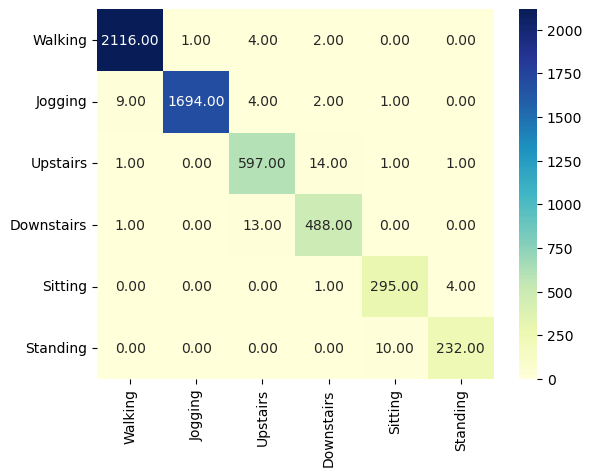

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [32]:
#6-4
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 195, 64)           1216      
                                                                 
 conv1d_15 (Conv1D)          (None, 192, 64)           16448     
                                                                 
 dropout_14 (Dropout)        (None, 192, 64)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 96, 64)           0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_15 (Dropout)        (None, 90)                0         
                                                      

In [33]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 01:48:46.656653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:48:46.841276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:48:47.549363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7067 - accuracy: 0.7552

2024-05-05 01:49:05.003313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:49:05.082335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 63ms/step - loss: 0.7067 - accuracy: 0.7552 - val_loss: 0.4357 - val_accuracy: 0.8381
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.3837 - accuracy: 0.8534 - val_loss: 0.3718 - val_accuracy: 0.8636
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2818 - accuracy: 0.8909 - val_loss: 0.2639 - val_accuracy: 0.9016
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2035 - accuracy: 0.9261 - val_loss: 0.1716 - val_accuracy: 0.9367
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1592 - accuracy: 0.9445 - val_loss: 0.2983 - val_accuracy: 0.8982
Epoch 6/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1237 - accuracy: 0.9572 - val_loss: 0.1447 - val_accuracy: 0.9515
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1197 - accuracy: 0.9610 - val_loss: 0.1152 - val_accuracy: 0.9624
Epo

2024-05-05 01:53:26.258110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:53:26.330559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 21ms/step
f1_score =  0.9849314533806526
0.9848843562192678
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      1.00      1.00      1710
           2       0.97      0.95      0.96       614
           3       0.93      0.97      0.95       502
           4       1.00      0.94      0.97       300
           5       0.93      0.99      0.96       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.99      0.98      0.98      5491



<Axes: >

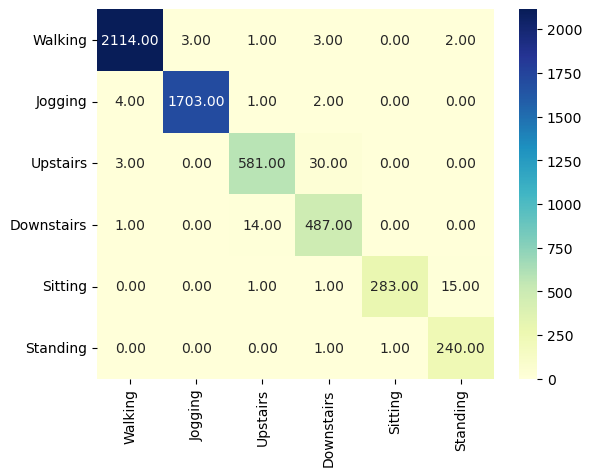

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [35]:
#6-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 195, 64)           1216      
                                                                 
 conv1d_17 (Conv1D)          (None, 191, 64)           20544     
                                                                 
 dropout_16 (Dropout)        (None, 191, 64)           0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 95, 64)           0         
 1D)                                                             
                                                                 
 lstm_8 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_17 (Dropout)        (None, 90)                0         
                                                      

In [36]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 01:53:43.158768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:53:43.347164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:53:44.030558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7137 - accuracy: 0.7530

2024-05-05 01:54:01.806570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:54:01.896918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 65ms/step - loss: 0.7137 - accuracy: 0.7530 - val_loss: 0.6375 - val_accuracy: 0.7807
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.4204 - accuracy: 0.8478 - val_loss: 0.3470 - val_accuracy: 0.8718
Epoch 3/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2889 - accuracy: 0.8921 - val_loss: 0.2031 - val_accuracy: 0.9217
Epoch 4/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2029 - accuracy: 0.9269 - val_loss: 0.1558 - val_accuracy: 0.9440
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1657 - accuracy: 0.9447 - val_loss: 0.1465 - val_accuracy: 0.9442
Epoch 6/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1566 - accuracy: 0.9479 - val_loss: 0.1188 - val_accuracy: 0.9629
Epoch 7/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1347 - accuracy: 0.9591 - val_loss: 0.2246 - val_accuracy: 0.9287
Epo

2024-05-05 01:59:26.239074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:59:26.311514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9803355821319054
0.9803314514660353
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.94      0.98      0.96       614
           3       0.98      0.92      0.95       502
           4       0.99      0.94      0.96       300
           5       0.92      0.99      0.95       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

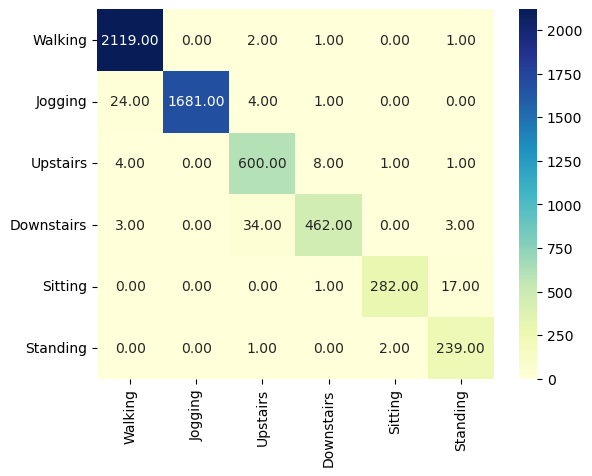

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [38]:
#6-7
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 195, 64)           1216      
                                                                 
 conv1d_19 (Conv1D)          (None, 189, 64)           28736     
                                                                 
 dropout_18 (Dropout)        (None, 189, 64)           0         
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_19 (Dropout)        (None, 90)                0         
                                                      

In [39]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 01:59:51.610368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:59:51.823856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 01:59:52.485766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.7648

2024-05-05 02:00:11.178810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:00:11.268863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 68ms/step - loss: 0.6848 - accuracy: 0.7648 - val_loss: 0.5092 - val_accuracy: 0.8021
Epoch 2/20
275/275 [==============================] - 13s 49ms/step - loss: 0.3730 - accuracy: 0.8595 - val_loss: 0.3486 - val_accuracy: 0.8627
Epoch 3/20
275/275 [==============================] - 13s 49ms/step - loss: 0.2683 - accuracy: 0.9052 - val_loss: 0.2423 - val_accuracy: 0.9123
Epoch 4/20
275/275 [==============================] - 14s 49ms/step - loss: 0.2524 - accuracy: 0.9119 - val_loss: 0.3061 - val_accuracy: 0.8939
Epoch 5/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1970 - accuracy: 0.9315 - val_loss: 0.2030 - val_accuracy: 0.9224
Epoch 6/20
275/275 [==============================] - 13s 49ms/step - loss: 0.1522 - accuracy: 0.9502 - val_loss: 0.1629 - val_accuracy: 0.9440
Epoch 7/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1238 - accuracy: 0.9587 - val_loss: 0.1499 - val_accuracy: 0.9454
Epo

2024-05-05 02:04:55.933934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:04:56.001717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9750319052822362
0.9745037333818977
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      0.96      0.98      1710
           2       0.86      0.98      0.92       614
           3       0.97      0.96      0.96       502
           4       1.00      0.97      0.98       300
           5       0.96      1.00      0.98       242

    accuracy                           0.97      5491
   macro avg       0.96      0.97      0.97      5491
weighted avg       0.98      0.97      0.98      5491



<Axes: >

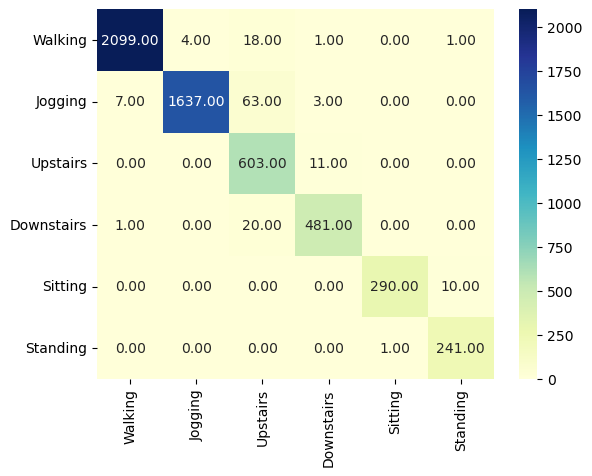

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [42]:
#7-2
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_23 (Conv1D)          (None, 193, 64)           8256      
                                                                 
 dropout_22 (Dropout)        (None, 193, 64)           0         
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 96, 64)           0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_23 (Dropout)        (None, 90)                0         
                                                     

In [43]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 02:05:39.663796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:05:39.854682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:05:40.586102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.7662

2024-05-05 02:05:58.882061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:05:58.970101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 67ms/step - loss: 0.6806 - accuracy: 0.7662 - val_loss: 0.4912 - val_accuracy: 0.8260
Epoch 2/20
275/275 [==============================] - 13s 49ms/step - loss: 0.3792 - accuracy: 0.8618 - val_loss: 0.2840 - val_accuracy: 0.8980
Epoch 3/20
275/275 [==============================] - 13s 49ms/step - loss: 0.2928 - accuracy: 0.8942 - val_loss: 0.2352 - val_accuracy: 0.9173
Epoch 4/20
275/275 [==============================] - 13s 49ms/step - loss: 0.2091 - accuracy: 0.9281 - val_loss: 0.3088 - val_accuracy: 0.8866
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1715 - accuracy: 0.9378 - val_loss: 0.1468 - val_accuracy: 0.9476
Epoch 6/20
275/275 [==============================] - 13s 49ms/step - loss: 0.2135 - accuracy: 0.9290 - val_loss: 0.4344 - val_accuracy: 0.8490
Epoch 7/20
275/275 [==============================] - 14s 49ms/step - loss: 0.1465 - accuracy: 0.9515 - val_loss: 0.1282 - val_accuracy: 0.9551
Epo

2024-05-05 02:13:56.761475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:13:56.841009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9471486704269466
0.9450009105809506
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2123
           1       1.00      0.89      0.94      1710
           2       0.74      0.95      0.83       614
           3       0.87      0.99      0.92       502
           4       1.00      0.94      0.97       300
           5       0.94      1.00      0.97       242

    accuracy                           0.95      5491
   macro avg       0.92      0.96      0.94      5491
weighted avg       0.96      0.95      0.95      5491



<Axes: >

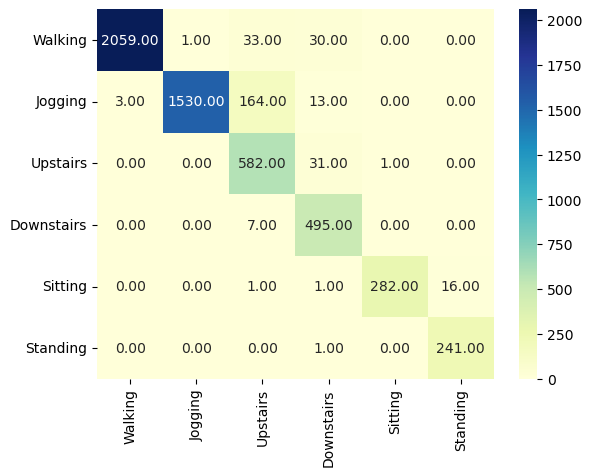

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [45]:
#7-3
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_25 (Conv1D)          (None, 192, 64)           12352     
                                                                 
 dropout_24 (Dropout)        (None, 192, 64)           0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 96, 64)           0         
 g1D)                                                            
                                                                 
 lstm_12 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_25 (Dropout)        (None, 90)                0         
                                                     

In [46]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 02:14:30.035384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:14:30.238171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:14:30.974024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6612 - accuracy: 0.7749

2024-05-05 02:14:49.547060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:14:49.633693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 68ms/step - loss: 0.6612 - accuracy: 0.7749 - val_loss: 0.4704 - val_accuracy: 0.8199
Epoch 2/20
275/275 [==============================] - 14s 50ms/step - loss: 0.3777 - accuracy: 0.8591 - val_loss: 0.3707 - val_accuracy: 0.8377
Epoch 3/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2709 - accuracy: 0.8958 - val_loss: 0.3138 - val_accuracy: 0.8882
Epoch 4/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2325 - accuracy: 0.9133 - val_loss: 0.1837 - val_accuracy: 0.9312
Epoch 5/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1709 - accuracy: 0.9423 - val_loss: 0.1676 - val_accuracy: 0.9383
Epoch 6/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1508 - accuracy: 0.9480 - val_loss: 0.1790 - val_accuracy: 0.9335
Epoch 7/20
275/275 [==============================] - 14s 50ms/step - loss: 0.1225 - accuracy: 0.9571 - val_loss: 0.2962 - val_accuracy: 0.8928
Epo

2024-05-05 02:19:16.926916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:19:17.017352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 21ms/step
f1_score =  0.9731702377362337
0.972864687670734
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.95      0.98      1710
           2       0.88      0.97      0.92       614
           3       0.95      0.97      0.96       502
           4       0.98      0.92      0.95       300
           5       0.91      0.98      0.94       242

    accuracy                           0.97      5491
   macro avg       0.95      0.97      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

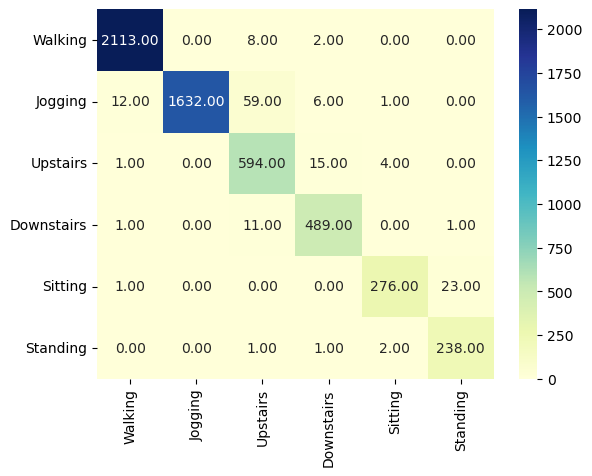

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [48]:
#7-4
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_27 (Conv1D)          (None, 191, 64)           16448     
                                                                 
 dropout_26 (Dropout)        (None, 191, 64)           0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 95, 64)           0         
 g1D)                                                            
                                                                 
 lstm_13 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_27 (Dropout)        (None, 90)                0         
                                                     

In [49]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 02:19:32.764299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:19:32.972275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:19:33.655061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7073 - accuracy: 0.7548

2024-05-05 02:19:51.918956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:19:52.005237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 67ms/step - loss: 0.7073 - accuracy: 0.7548 - val_loss: 0.5007 - val_accuracy: 0.7892
Epoch 2/20
275/275 [==============================] - 14s 50ms/step - loss: 0.3768 - accuracy: 0.8557 - val_loss: 0.2572 - val_accuracy: 0.8953
Epoch 3/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2701 - accuracy: 0.8962 - val_loss: 0.2260 - val_accuracy: 0.9144
Epoch 4/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2066 - accuracy: 0.9257 - val_loss: 0.2750 - val_accuracy: 0.8989
Epoch 5/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1577 - accuracy: 0.9476 - val_loss: 0.1823 - val_accuracy: 0.9388
Epoch 6/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1261 - accuracy: 0.9588 - val_loss: 0.0949 - val_accuracy: 0.9684
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1062 - accuracy: 0.9651 - val_loss: 0.1036 - val_accuracy: 0.9652
Epo

2024-05-05 02:24:29.526897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:24:29.608329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 21ms/step
f1_score =  0.9525607297322812
0.951192861045347
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2123
           1       1.00      0.90      0.95      1710
           2       0.79      0.92      0.85       614
           3       0.84      0.99      0.91       502
           4       0.99      0.98      0.99       300
           5       0.98      0.99      0.98       242

    accuracy                           0.95      5491
   macro avg       0.93      0.96      0.94      5491
weighted avg       0.96      0.95      0.95      5491



<Axes: >

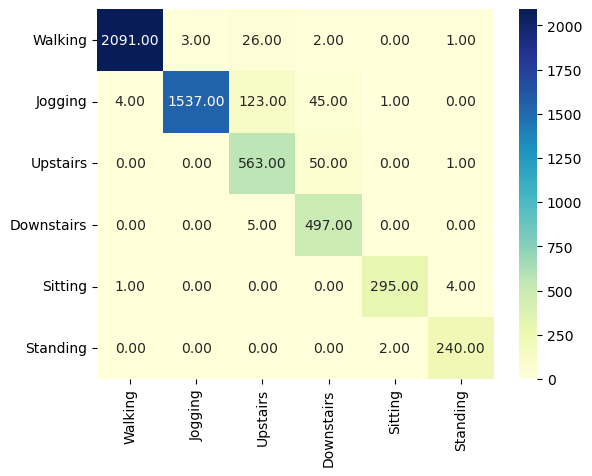

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [51]:
#7-5
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_29 (Conv1D)          (None, 190, 64)           20544     
                                                                 
 dropout_28 (Dropout)        (None, 190, 64)           0         
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 95, 64)           0         
 g1D)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_29 (Dropout)        (None, 90)                0         
                                                     

In [52]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 02:25:02.374681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:25:02.588367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:25:03.311785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7095 - accuracy: 0.7541

2024-05-05 02:25:22.344484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:25:22.426365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 70ms/step - loss: 0.7095 - accuracy: 0.7541 - val_loss: 0.4681 - val_accuracy: 0.8317
Epoch 2/20
275/275 [==============================] - 14s 51ms/step - loss: 0.3893 - accuracy: 0.8579 - val_loss: 0.2972 - val_accuracy: 0.8782
Epoch 3/20
275/275 [==============================] - 14s 51ms/step - loss: 0.2631 - accuracy: 0.9018 - val_loss: 0.2067 - val_accuracy: 0.9249
Epoch 4/20
275/275 [==============================] - 14s 52ms/step - loss: 0.2164 - accuracy: 0.9232 - val_loss: 0.2086 - val_accuracy: 0.9240
Epoch 5/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1631 - accuracy: 0.9452 - val_loss: 0.2831 - val_accuracy: 0.9037
Epoch 6/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1504 - accuracy: 0.9503 - val_loss: 0.1374 - val_accuracy: 0.9476
Epoch 7/20
275/275 [==============================] - 14s 52ms/step - loss: 0.1191 - accuracy: 0.9615 - val_loss: 0.1464 - val_accuracy: 0.9492
Epo

2024-05-05 02:30:05.051483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:30:05.140499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 21ms/step
f1_score =  0.9810540838469322
0.9810599162265525
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.97      0.94      0.96       614
           3       0.94      0.97      0.96       502
           4       0.99      0.91      0.94       300
           5       0.90      0.98      0.94       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

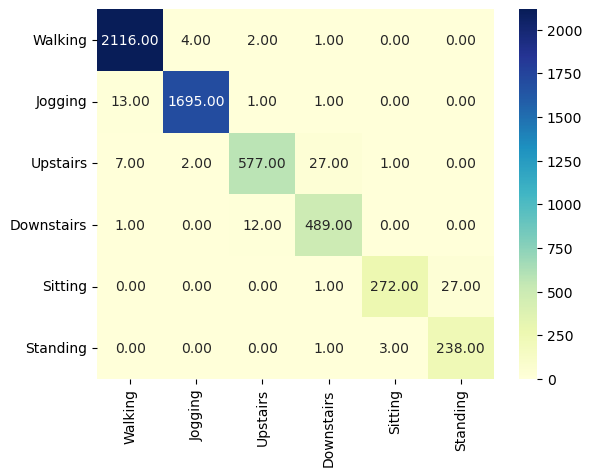

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [54]:
#7-6
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 194, 64)           1408      
                                                                 
 conv1d_31 (Conv1D)          (None, 190, 64)           20544     
                                                                 
 dropout_30 (Dropout)        (None, 190, 64)           0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 95, 64)           0         
 g1D)                                                            
                                                                 
 lstm_15 (LSTM)              (None, 90)                55800     
                                                                 
 dropout_31 (Dropout)        (None, 90)                0         
                                                     

In [55]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-05 02:30:21.174452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:30:21.418219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:30:22.207267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.7690

2024-05-05 02:30:41.295199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:30:41.386552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 70ms/step - loss: 0.6715 - accuracy: 0.7690 - val_loss: 0.4131 - val_accuracy: 0.8447
Epoch 2/20
275/275 [==============================] - 14s 51ms/step - loss: 0.3992 - accuracy: 0.8535 - val_loss: 0.3050 - val_accuracy: 0.8768
Epoch 3/20
275/275 [==============================] - 14s 51ms/step - loss: 0.2604 - accuracy: 0.9044 - val_loss: 0.2869 - val_accuracy: 0.8937
Epoch 4/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2042 - accuracy: 0.9281 - val_loss: 0.2322 - val_accuracy: 0.9151
Epoch 5/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1593 - accuracy: 0.9469 - val_loss: 0.1232 - val_accuracy: 0.9540
Epoch 6/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1579 - accuracy: 0.9495 - val_loss: 0.1658 - val_accuracy: 0.9438
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1194 - accuracy: 0.9616 - val_loss: 0.2101 - val_accuracy: 0.9180
Epo

2024-05-05 02:39:10.016703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-05 02:39:10.095995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 22ms/step
f1_score =  0.9786521356645961
0.9786924057548716
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.89      0.99      0.94       614
           3       1.00      0.86      0.93       502
           4       0.99      0.95      0.97       300
           5       0.93      1.00      0.96       242

    accuracy                           0.98      5491
   macro avg       0.97      0.96      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

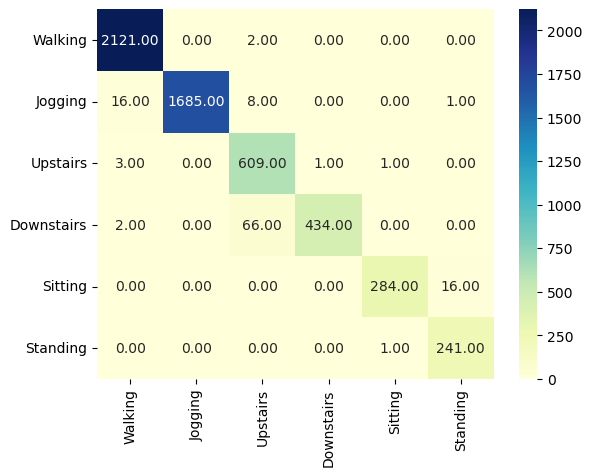

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')